<a href="https://colab.research.google.com/github/pen1064/Toronto_House_Market/blob/main/Pipeline_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
house_data = pd.read_csv('house_complete_details_clean.csv')
house_data.head(3)

,sold_price,list_price,bedroom,bathroom,sqft,type,parking,lat,long,Line,Station,Dist,city_district,mean_income,final_price_persqft
0,600000.0,550000.0,1,1,249.5,Condo,1.0,43.655293,-79.384117,Yonge-University-Spadina,Dundas,0.314122,Bay Street Corridor (76),56526.0,2404.809619
1,660000.0,599000.0,1,1,549.5,Condo,1.0,43.626188,-79.486044,Bloor-Danforth,Jane,2.655549,Mimico (includes Humber Bay Shores) (17),54438.0,1201.091902
2,825000.0,699000.0,2,1,749.5,Condo,1.0,43.766876,-79.379817,Sheppard,Bessarion,0.398999,Bayview Village (52),52035.0,1100.733823


In [ ]:
house_data.dropna(subset=["sqft", "sold_price"], inplace=True)
house_data.reset_index(drop=True, inplace=True)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28069 entries, 0 to 28068
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sold_price           28069 non-null  float64
 1   list_price           28069 non-null  float64
 2   bedroom              28069 non-null  int64  
 3   bathroom             28069 non-null  int64  
 4   sqft                 28069 non-null  float64
 5   type                 28069 non-null  object 
 6   parking              28069 non-null  float64
 7   lat                  28069 non-null  float64
 8   long                 28069 non-null  float64
 9   Line                 28069 non-null  object 
 10  Station              28069 non-null  object 
 11  Dist                 28069 non-null  float64
 12  city_district        28069 non-null  object 
 13  mean_income          28069 non-null  float64
 14  final_price_persqft  28069 non-null  float64
dtypes: float64(9), int64(2), object(4)
m

In [ ]:
house_data.describe()

,sold_price,list_price,bedroom,bathroom,sqft,parking,lat,long,Dist,mean_income,final_price_persqft
count,2.806900e+04,2.806900e+04,28069.000000,28069.000000,28069.000000,28069.000000,28069.000000,28069.000000,28069.000000,28069.000000,28069.000000
mean,9.445045e+05,9.089029e+05,1.893976,1.862482,1076.683387,1.760661,43.689509,-79.409539,1.884770,59407.066372,960.766584
std,7.449571e+05,7.559434e+05,1.053717,1.083403,745.603691,3.845568,0.051436,0.076440,1.897231,32025.933256,377.122558
min,2.610000e+05,1.000000e+00,0.000000,1.000000,249.500000,0.000000,43.589529,-79.624420,0.023750,25989.000000,125.600000
25%,5.950000e+05,5.750000e+05,1.000000,1.000000,649.500000,1.000000,43.645809,-79.451863,0.569224,37422.000000,733.822548
50%,7.200000e+05,6.990000e+05,2.000000,2.000000,849.500000,1.000000,43.670042,-79.403058,1.248047,53583.000000,926.803581
75%,9.750000e+05,9.250000e+05,2.000000,2.000000,1299.500000,2.000000,43.731316,-79.378201,2.575736,70600.000000,1088.875809
max,1.980000e+07,2.100000e+07,9.000000,12.000000,5000.000000,412.000000,43.817837,-79.146151,11.923384,308010.000000,3960.000000


In [ ]:
from sklearn.preprocessing import PowerTransformer

class columnDrop:
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return X.drop(self.columns, axis=1)

class columnTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    X = X.divide(self.factor)
    pt = PowerTransformer(method='box-cox')
    X = X.to_numpy().reshape(-1,1)
    X = pt.fit_transform(X, y=None)
    return X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

house_data = pd.read_csv('house_complete_details_clean.csv')
cat_keys = house_data.select_dtypes('object').keys()
num_keys = house_data.drop(columns=['sold_price']).select_dtypes(['int64', 'float']).keys()
num_pipe = Pipeline([('drop', columnDrop(['lat', 'long', 'list_price', 'final_price_persqft'])),
                     ('fillna', SimpleImputer(strategy='constant', verbose=0))])

div1_pipe = Pipeline([('div',columnTransform(1))]) #dist
div10_pipe = Pipeline([('div',columnTransform(10))]) #mean
div100_pipe = Pipeline([('div',columnTransform(100))]) #sold

cat_pipe = Pipeline([('drop', columnDrop(['Station', 'city_district'])), 
                     ('one-hot', OneHotEncoder(categories='auto', sparse=False,handle_unknown='ignore'))])

preproc_pipe = ColumnTransformer([('normal', num_pipe, ['lat', 'long', 'list_price', 'final_price_persqft', 'bedroom', 'bathroom', 'parking', 'sqft']),
                                 ('div1', div1_pipe, ['Dist']),
                                 ('div10', div10_pipe, ['mean_income']),
                                 ('cat', cat_pipe, cat_keys)])


In [ ]:
from sklearn.model_selection import train_test_split  
house_data = pd.read_csv('house_complete_details_clean.csv')
X = house_data.copy()
y = house_data['sold_price']
y = div100_pipe.fit_transform(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
X_train_t = preproc_pipe.fit_transform(Xtrain)
X_test = preproc_pipe.transform(Xtest)


In [ ]:
import xgboost
from xgboost import XGBRegressor, DMatrix
from sklearn.metrics import mean_squared_error

model_pipe = Pipeline([('model', XGBRegressor())])
overall_pipe = Pipeline([('preproc', preproc_pipe),('model', model_pipe)])

overall_pipe.fit(Xtrain, ytrain)
y_pred = overall_pipe.predict(Xtest)
print(mean_squared_error(y_pred, ytest))

"""
max_depth=3, 
learning_rate=0.1, 
n_estimators=100, 
verbosity=1, 
objective="reg:linear",
 booster='gbtree', nthread=None, 
 gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1,
  colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
  base_score=0.5, random_state=0, seed=None, missing=None, importance_type="gain", **kwargs)\
"""

[00:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.19140547968796653


'\nmax_depth=3, \nlearning_rate=0.1, \nn_estimators=100, \nverbosity=1, \nobjective="reg:linear",\n booster=\'gbtree\', nthread=None, \n gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1,\n  colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, \n  base_score=0.5, random_state=0, seed=None, missing=None, importance_type="gain", **kwargs)'

In [ ]:
from hyperopt import hp, fmin, Trials, STATUS_OK, tpe
from functools import partial


SPACE = {
    'params':{
        'max_depth': hp.quniform('max_depth', 3,8,1),
        'min_child_weight': hp.quniform('min_child_weight', 3,8,1),
        'gamma': hp.uniform('gamma', 0.1,10),
        'reg_alpha': hp.uniform('reg_alpha', 0.1,10),
        'reg_lambda': hp.uniform('reg_lambda', 0.1,10),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.6,1),
    }
}

def objective(hps, X, y, pipe):
  hps['params']['max_depth'] = int(hps['params']['max_depth'])
  hps['params']['min_child_weight'] = int(hps['params']['min_child_weight'])
  XG = DMatrix(pipe.fit_transform(X), y)
  results = xgboost.cv(hps['params'], XG, nfold=4, metrics='rmse', early_stopping_rounds=50)
  score = np.mean(results['test-rmse-mean'])
  loss = score
  print(score)
  return {'loss':loss, 'params': hps, 'status': STATUS_OK}

bT = Trials()
best = fmin(partial(objective, X = Xtrain, y = ytrain, pipe = preproc_pipe), SPACE, algo=tpe.suggest, max_evals=100, trials=bT, rstate=np.random.RandomState(0))

0.566068475
0.54616635
0.60120605
0.5711126000000001
0.5567222000000001
0.57123255
0.564666825
0.5678715
0.597419975
0.540072625
0.528323075
0.6076360999999999
0.55633175
0.5818131250000002
0.528577775
0.5955212
0.6398181999999999
0.5928927749999999
0.5333787750000001
0.5614625750000001
0.5300117249999999
0.5287883000000001
0.5229028000000001
0.522140675
0.514651325
0.573784425
0.51878875
0.514724
0.5216774000000001
0.5404118250000001
0.529272675
0.536273675
0.5421622750000001
0.5330176
0.5422066249999999
0.537329875
0.56356645
0.530711425
0.5402906999999999
0.5914046749999999
0.5317523
0.534269475
0.5341956499999999
0.5465625749999999
0.554205175
0.571637425
0.527606125
0.521843125
0.54566695
0.5504690999999999
0.567274775
0.5870428249999999
0.5916558500000001
0.514360575
0.5308859499999999
0.520356375
0.5367928250000001
0.5647552
0.551800575
0.5174424000000001
0.5286514
0.5467076000000002
0.523683975
0.545375975
0.5182938
0.5201818
0.5075261249999999
0.50621005
0.507733075
0.52017945

In [ ]:
print(best)

{'colsample_bytree': 0.9117709641368095, 'gamma': 3.2096912055387072, 'max_depth': 8.0, 'min_child_weight': 7.0, 'reg_alpha': 1.33979400630089, 'reg_lambda': 0.49131390975688377}


In [ ]:
params=best
model_pipe = Pipeline([('model', XGBRegressor(colsample_bytree= 0.9117709641368095, 
gamma= 3.2096912055387072, max_depth= 8, min_child_weight= 7, 
reg_alpha= 1.33979400630089, reg_lambda= 0.49131390975688377))])
overall_pipe = Pipeline([('preproc', preproc_pipe),('model', model_pipe)])

overall_pipe.fit(Xtrain, ytrain)
y_pred = overall_pipe.predict(Xtest)
print(mean_squared_error(y_pred, ytest))

[00:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15597186627111415


In [ ]:
class copyTransformer():
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    print(self.columns)
    return X.loc[self.columns]

In [ ]:
print(Xtrain.keys())

Index(['sold_price', 'list_price', 'bedroom', 'bathroom', 'sqft', 'type',
       'parking', 'lat', 'long', 'Line', 'Station', 'Dist', 'city_district',
       'mean_income', 'final_price_persqft'],
      dtype='object')


In [ ]:
cat_copy_pipe = Pipeline([('drop', columnDrop(['Station', 'city_district']))])
print(cat_copy_pipe.fit_transform(Xtrain[cat_keys]))


preproc_pipe_lgbm = ColumnTransformer([('normal', num_pipe, ['lat', 'long', 'list_price', 'final_price_persqft', 'bedroom', 'bathroom', 'parking', 'sqft']),
                                 ('div1', div1_pipe, ['Dist']),
                                 ('div10', div10_pipe, ['mean_income']),
                                 ('cat', cat_copy_pipe, cat_keys)])



                   type                      Line
25774         Co-Op Apt                  Sheppard
23391  Att/Row/Twnhouse            Bloor-Danforth
3588           Detached            Bloor-Danforth
14753   Condo Townhouse            Bloor-Danforth
20759             Condo            Bloor-Danforth
...                 ...                       ...
22821             Condo  Yonge-University-Spadina
20490     Semi-Detached  Yonge-University-Spadina
8394              Condo            Bloor-Danforth
4675   Att/Row/Twnhouse  Yonge-University-Spadina
17064   Condo Townhouse  Yonge-University-Spadina

[22455 rows x 2 columns]


In [ ]:
import lightgbm as lgbm
from lightgbm import Dataset
lgbm_pipe = Pipeline([('lgbm', lgbm.LGBMRegressor(n_jobs=-1))])
overall_lgbm_pipe = Pipeline([('preproc', preproc_pipe_lgbm), ('model', lgbm_pipe)])
SPACEL ={
    'params':{
        'max_depth': hp.quniform('max_depth', 1, 8, 1),
        'min_child_samples': hp.quniform('min_child_samples', 20, 100, 20),
        'n_estimators': hp.quniform('n_estimators', 100, 200, 10),
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
        'min_child_weight': hp.uniform('min_child_sample', 0.001, 0.5),
        'reg_alpha':  hp.uniform('reg_alpha', 0.1, 10),
        'reg_lambda':  hp.uniform('reg_lambda', 0.1, 10),
    }
}


from functools import partial
from hyperopt import tpe, hp, fmin, Trials, STATUS_OK
def objective2(hps, X, y, pipe):
  hps['params']['max_depth'] = int(hps['params']['max_depth'])
  hps['params']['min_child_samples'] = int(hps['params']['min_child_samples'])
  hps['params']['n_estimators'] = int(hps['params']['n_estimators'])
  print( hps['params'])
  LGBD = Dataset(data=pipe.fit_transform(Xtrain), label=ytrain.squeeze(1))
  result = lgbm.cv(params= hps['params'],train_set = LGBD, metrics='rmse', stratified=False)
  print(result)
  mean_score = np.mean(result['rmse-mean'])
  loss = 1-mean_score
  return {'loss':loss, 'params': hps['params'], 'status': STATUS_OK}

lt = Trials()
blt = fmin(partial(objective2, X=Xtrain, y=ytrain, pipe=preproc_pipe), space=SPACEL, algo=tpe.suggest, trials=lt, max_evals=100)


{'learning_rate': 0.0666121017481211, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.48112879451665364, 'n_estimators': 180, 'reg_alpha': 9.570673545961599, 'reg_lambda': 8.040002045005204}
  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9522322734689341, 0.9068431404439279, 0.8651485582995662, 0.8269074019857412, 0.7920546181987389, 0.7601097975204947, 0.731053315210912, 0.7041799339151215, 0.6796710223138419, 0.6571988865317628, 0.6366852612467534, 0.6178829792138465, 0.600950900847349, 0.5855112596734929, 0.5714402850796141, 0.5586928806588921, 0.5470883188967026, 0.5365822410687444, 0.5270276746967129, 0.5182538467069198, 0.5105748415649167, 0.503371286733226, 0.49683844160790036, 0.4908972642465076, 0.4854786219168939, 0.48038069101468156, 0.47593241781135615, 0.47177674075173287, 0.4677919953947446, 0.4640236708666315, 0.4605851057764358, 0.45745879146716356, 0.4545003304744787, 0.45165312498144683, 0.4490587221361091, 0.4465292533458995, 0.44435316112793366, 0.4421684233937674, 0.4401412822567578, 0.43828864953781627, 0.4365287311946299, 0.4348793536694435, 0.4333532506441985, 0.43168042728508116, 0.4302569060040195, 0.42880754417582445, 0.42723216671928277, 0.42603474987297885, 0.42445869850595

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7948347559590243, 0.6609661427103987, 0.5750495161254052, 0.521261738809092, 0.48686970084275283, 0.4648510243588341, 0.4500886798201707, 0.4392721929943962, 0.4311115505592668, 0.42426592223331766, 0.4173120482922519, 0.4132712612569752, 0.408993969595368, 0.4056929100843817, 0.4031205036589542, 0.40072045619003854, 0.39872617967446666, 0.3966177297814089, 0.39507957183991127, 0.39354714495486026, 0.3916424590612815, 0.39035490571564446, 0.3886674105921977, 0.38675802961048367, 0.385262964987135, 0.3838845392840854, 0.3822625629512371, 0.3812296505198656, 0.3797428097380524, 0.3786786318246353, 0.37772398749631975, 0.37712645130821026, 0.37564749845170775, 0.3747732489533156, 0.3736852561572245, 0.373145262964983, 0.3726263467226382, 0.37170794681920777, 0.3710265024298748, 0.3706315037961482, 0.3698559545243997, 0.36902597001694115, 0.3682868949069644, 0.36785733897846384, 0.36731624119405665, 0.36704926238470015, 0.36662117817414036, 0.3661100861782486, 0.3654946993

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9321926694262933, 0.870934818269982, 0.8167192611339933, 0.7686343596141432, 0.7263251188130879, 0.6891477562583511, 0.6559707701442086, 0.6274007905679523, 0.6020240232906671, 0.5801956061330032, 0.5611309727612002, 0.5443404062302616, 0.5299222981592799, 0.5172031328479564, 0.5063476433018445, 0.49680588674147275, 0.4885695689167747, 0.4808907108355257, 0.4741153230185807, 0.46809896496203257, 0.46278826449382243, 0.45822123992692143, 0.4538401311352878, 0.4503498052528192, 0.44681115094971136, 0.44349458954167825, 0.4405548015573775, 0.4376005623339189, 0.435223420206116, 0.43233393026467504, 0.4298628375259252, 0.42800784364814987, 0.4260818689762978, 0.4243052742808692, 0.4225724135282453, 0.42064920552298046, 0.41936068807110416, 0.41793856771295423, 0.41667239973281667, 0.4153124919728411, 0.4141101815340888, 0.4130473789159483, 0.412082933667802, 0.410967690674254, 0.409948180646888, 0.4087693233602347, 0.4078292314952364, 0.4069238615418775, 0.4058221862195969

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7987031152876, 0.6657392595771823, 0.5794091516765175, 0.525269799323987, 0.4914127586666398, 0.46884516543882626, 0.45363174917119925, 0.4424725399064743, 0.4331718245389962, 0.426303595787506, 0.4205727230368209, 0.4160261615072294, 0.4118659582124127, 0.40845305415235184, 0.40528891029496916, 0.4025896157310747, 0.40050920980669824, 0.3980271303401751, 0.396208538980645, 0.39341528625316896, 0.3915794113927187, 0.3897964185730705, 0.38788364906255546, 0.386075031475403, 0.3852048239891376, 0.3835115049489325, 0.38227745126541784, 0.38057945576810925, 0.37906328337743955, 0.3778149194603723, 0.3768356491291379, 0.37598263837785534, 0.37471327790968395, 0.37377835272530074, 0.37316230224938457, 0.37240471563489763, 0.37173924181344586, 0.370916356110101, 0.37048274967578265, 0.3696067333984299, 0.36896430159538396, 0.36809610150408834, 0.36738876098135453, 0.3665261837563863, 0.36617569342738043, 0.36549534369747066, 0.3651337490521038, 0.36453355654267766, 0.36391211

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7686396130767589, 0.6667300655622241, 0.6020025771121617, 0.5651762449892556, 0.5362486724058971, 0.5182834336660627, 0.5084058853434092, 0.502230033837832, 0.496964330834705, 0.4943131624060018, 0.49138671355072355, 0.48912785547322335, 0.4862410242644895, 0.4833253178728171, 0.48155156916870173, 0.47936831288623516, 0.4770669638857764, 0.47489519057443264, 0.47157664611959726, 0.4696753600547522, 0.467842632269076, 0.46589631182189917, 0.4643539571482318, 0.4620857562233425, 0.46007333380324944, 0.4593250400158967, 0.4573558923433775, 0.45648383465710046, 0.454484203682245, 0.45317567231148786, 0.452433092175871, 0.4520013738285546, 0.45138519135994654, 0.4502970997240608, 0.44906978532409536, 0.44800868355119644, 0.4464139030201009, 0.4448865018614163, 0.4441257025515989, 0.4428834887854866, 0.4413838576487749, 0.43976669685448505, 0.43884965635341777, 0.43816414674085796, 0.43738980290428425, 0.43660653612089895, 0.43613768248861867, 0.43561450369501253, 0.43482335

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.6942279339097579, 0.5650511161301256, 0.5100556036678383, 0.4862940099671141, 0.4752197195655393, 0.46552288568947675, 0.45689461910880025, 0.4506662006080278, 0.44693263500186936, 0.4416805008973162, 0.43794922158513944, 0.43405182859520525, 0.4296424542089879, 0.4272760406830079, 0.42417941439234913, 0.4211884702818856, 0.41910079593267574, 0.41690776483453906, 0.41534974246009104, 0.4137976509794526, 0.4115498642287131, 0.41002381923091413, 0.40869309295566153, 0.40647070810773006, 0.4055943026136938, 0.4042639738975378, 0.4027199330786527, 0.40131383826906875, 0.4000270123833561, 0.39878953484573565, 0.39756943541020395, 0.39687608113259065, 0.39603307725960823, 0.39499422337951773, 0.3941653476384353, 0.392862273470165, 0.3919211097069876, 0.3912965234218472, 0.39036359990382374, 0.38962907420638915, 0.38873240016521293, 0.38790857607309526, 0.38716392351144097, 0.3864726626807701, 0.38577409649189276, 0.38505477378646774, 0.3844097541556133, 0.38384706326769036, 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8187292572730518, 0.7205073957777474, 0.6539354986619305, 0.6093129198502029, 0.5782008353870461, 0.5505591324721433, 0.5324660382725006, 0.5187428224435455, 0.5095184736847653, 0.5041371708662499, 0.4989529859970469, 0.49484462198124507, 0.49148246594772776, 0.4889448743674295, 0.48644655899482886, 0.4834013211575071, 0.4815922012658137, 0.48025127672214135, 0.4781693870415268, 0.4769043990214435, 0.4753182633797185, 0.4740243587965153, 0.471856329414889, 0.4706062525240952, 0.4690449640451087, 0.4681639119195725, 0.46676268771781776, 0.4655195422784704, 0.46405002865941414, 0.463233495285199, 0.4619522238307224, 0.4603938620989051, 0.45947430794532407, 0.45840767955005524, 0.4576830729128144, 0.45662167099038803, 0.4554784194996683, 0.4547813926499355, 0.45364054196387105, 0.45286052754560957, 0.4524077636243131, 0.45153890761150156, 0.45067095024770704, 0.4499555418110705, 0.449576812036195, 0.4483079659782697, 0.44726075494343454, 0.4465156923492172, 0.445822280157

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7020284246886772, 0.5586136771554372, 0.4911548823814515, 0.45899442533419477, 0.4422473976244885, 0.4305181268034512, 0.4204619043434666, 0.41269751963581564, 0.4065483333363855, 0.40184087833297866, 0.39824095841947854, 0.3948446694064757, 0.3912360900114856, 0.3876547602239311, 0.38574003475240104, 0.38347359501321737, 0.3813420464362965, 0.3786850344168921, 0.37679191899896025, 0.3756434004932019, 0.37372576815843356, 0.3722313914605673, 0.3712417191825928, 0.3705761280386238, 0.3687448397898893, 0.3674754945387367, 0.36644467336325304, 0.36503829952326877, 0.36407765611039, 0.36315768739883414, 0.3622071161179066, 0.361144604943049, 0.36036847941683803, 0.35970760452841277, 0.35882650799172994, 0.35783841415227446, 0.35700475610192284, 0.3561917737870663, 0.3556224886251754, 0.355218828369454, 0.35482622625789706, 0.35426701987551834, 0.3537845823970143, 0.35311491704984876, 0.3525591506549037, 0.35209608572141504, 0.3514777619096058, 0.3507418548131464, 0.3503016

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7128993344963227, 0.5688501026896419, 0.49912739651920734, 0.46423286084617077, 0.4458163522572627, 0.4339162695164621, 0.4241268675981541, 0.4172041793560307, 0.4124744582563104, 0.4069713675774168, 0.4033959963309196, 0.3995889632606865, 0.3972299051992218, 0.3947250728416902, 0.39181620063039924, 0.3896784076037673, 0.3875756373771201, 0.38538821903215126, 0.3836544358021035, 0.38160726769642644, 0.37969981458660484, 0.3780081428624765, 0.37686059296576835, 0.37515415610242014, 0.374304832592572, 0.3724820683570764, 0.37167176264152235, 0.370629386219628, 0.3692671623079981, 0.36838684092717, 0.36743550552286786, 0.3670241160335299, 0.3664436143248253, 0.36591724304338186, 0.3651667900912172, 0.36467424201360704, 0.3638372275058145, 0.363476255874328, 0.36270761706388016, 0.3619556116542059, 0.36143259046041887, 0.36098024972759574, 0.3601936194641505, 0.359712135169978, 0.35893522440463715, 0.3585779272660174, 0.3583671592001137, 0.35761172616143444, 0.357146401753

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9034895234822473, 0.8225036416764478, 0.7552148883300899, 0.7003978157176824, 0.6550311593860064, 0.6180495534253463, 0.5885582447042064, 0.5632957863705192, 0.5442869982811825, 0.5281393863265889, 0.5148422316201449, 0.5042417936410011, 0.49540395693518047, 0.48831099260084193, 0.4819873631142787, 0.47686618772044076, 0.4724140971394866, 0.4680157175400871, 0.4641899593266087, 0.4612154421033175, 0.4584676677275203, 0.45574823823177246, 0.4530787943641247, 0.4512797995203387, 0.44919981699959954, 0.44719701995446537, 0.4453474288615957, 0.4440185635657242, 0.44230681039268305, 0.44106765484300253, 0.4398759610853137, 0.4386717723335842, 0.43697751698315496, 0.4359145849898258, 0.4345539791892488, 0.4337280410273527, 0.43242555355982926, 0.4311776863760411, 0.4299793438254098, 0.42904005272595536, 0.42815394671674145, 0.42723704812071883, 0.4258830178557066, 0.4246756634432963, 0.42304637334987094, 0.4224987911818533, 0.42190551103909285, 0.421031668222701, 0.419769879

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.892628204148014, 0.8035811347198152, 0.7307308788615419, 0.6715803668961107, 0.623702061726441, 0.5854338592238771, 0.5549420028313732, 0.5305513183924431, 0.5110897593420661, 0.4954829360307064, 0.4827312731515153, 0.47212956650715776, 0.46359466106651015, 0.45660917000360984, 0.4506428193782961, 0.44537486184755526, 0.4412719072843414, 0.43742507063228253, 0.4329114301025614, 0.4299359035423348, 0.4265260255834006, 0.42360852311681185, 0.42166303580696435, 0.4199932706791169, 0.41783449481839313, 0.41568547610285184, 0.4140931422981845, 0.41255084622364935, 0.41104945236865403, 0.40927559192735047, 0.4076359946199587, 0.4061465701831821, 0.4051552543428095, 0.4039005694259477, 0.4027418463501363, 0.4018248415951596, 0.4007055235740795, 0.40004495162279274, 0.3988834879699067, 0.39803550952577826, 0.3970648298534508, 0.3959493980767005, 0.3949843004023533, 0.3940509909390583, 0.39336397011243285, 0.39262904202109467, 0.391929480047406, 0.3913352121249337, 0.3908983740

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7280154910455033, 0.5843309169420603, 0.5104378109606622, 0.47302472100382903, 0.452140164759289, 0.43850415689915245, 0.42941883429620165, 0.42101988772947363, 0.4148230628371602, 0.4088716031100918, 0.4046767418486731, 0.4000344638124895, 0.396961550041215, 0.39434198470968457, 0.3915256817488171, 0.3895133114220097, 0.3872734006087193, 0.3856796353869807, 0.38377575284314924, 0.3821556749566399, 0.3809007041803092, 0.37911235353258294, 0.3772676069993631, 0.3758451696239615, 0.374925674086788, 0.3739143152869813, 0.3728923820325862, 0.3719511110924525, 0.37117567831808523, 0.37017325242416804, 0.369257495170554, 0.36852267958788565, 0.3676947260640083, 0.3667815415896354, 0.36598972370509897, 0.36541414879016976, 0.3647932011209413, 0.36444316730547205, 0.36404052823003186, 0.3633356777065359, 0.36277801446390123, 0.3621841570230852, 0.36162575995728286, 0.36109490394221, 0.36069720326812693, 0.36021704532602533, 0.3598016649810886, 0.3593079666539588, 0.35886197951

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8086885793005294, 0.6796298947936731, 0.5929076411991, 0.5367190097822846, 0.5003462115913528, 0.4764245401874086, 0.4604464457510239, 0.4485443330968777, 0.43986999064663335, 0.4325754836730926, 0.42755867012096277, 0.4223778128495187, 0.41793469226579927, 0.4131550716240107, 0.41034944364998927, 0.40780829625527104, 0.4052204424189319, 0.40330233995873643, 0.4016281326393802, 0.39975463460811483, 0.3976201774802527, 0.3959133663502599, 0.3942886475021688, 0.3932761266653756, 0.39139694619344717, 0.3904418310185876, 0.389321865295595, 0.38830111072363616, 0.38726058193468205, 0.38636074497064643, 0.38517242994574946, 0.38414830745074174, 0.3832828630985395, 0.38272691316522967, 0.38169371309961425, 0.38057317469277313, 0.37998114932745386, 0.3788642890873084, 0.3776422257246178, 0.37695644003664597, 0.3760635231744046, 0.3755219662297797, 0.37450295189060173, 0.3738365714656632, 0.3731254374571677, 0.3726527115656852, 0.3719511147672972, 0.3713628550499286, 0.37085637

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8225863257999416, 0.6971707730294818, 0.6101735390807296, 0.5511335977985056, 0.510930551435088, 0.4830716697997236, 0.46379073656641695, 0.44904310860451774, 0.4381553606264603, 0.4301571754087122, 0.4235727843936701, 0.4176403370010644, 0.41249017305281066, 0.40732770511319893, 0.4039327069138935, 0.40018876762229577, 0.3973200590386529, 0.39443995480857125, 0.3922646689315087, 0.3897413147475059, 0.3871923332286853, 0.38546370313487827, 0.3836916062953323, 0.3824990089065419, 0.3807105049648432, 0.3791728276263787, 0.377672462075137, 0.3763934269890221, 0.3750957208150188, 0.37390016914259616, 0.37272213972121143, 0.3714913228447726, 0.37038729030426076, 0.3694895206604739, 0.36851557744999336, 0.3676124776859669, 0.366888710599802, 0.36631910924399846, 0.36541945956124844, 0.36463652654927503, 0.36403092473640364, 0.3634748831305658, 0.3627711817340151, 0.3617787792065975, 0.36114846419418645, 0.36027415951604486, 0.35972589119096116, 0.3591748239715501, 0.35874879

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.772302088116435, 0.6321043984512443, 0.5491792845192714, 0.5001213817242534, 0.47018915103926445, 0.45121595480608445, 0.4380502576566669, 0.42755455707144974, 0.4201429764437675, 0.4143205475565561, 0.4079388882714262, 0.4038984382584451, 0.40071414015770807, 0.39767859732234256, 0.3943842123643867, 0.391035919379634, 0.3889645306088295, 0.38642813864845565, 0.3840780010888863, 0.38174395338047046, 0.37914682621783063, 0.37754413347886523, 0.3760891818904775, 0.37494699211024696, 0.37302696437971994, 0.37159655226863375, 0.37024682009934395, 0.36913083896920695, 0.3677006994342482, 0.3668514167312179, 0.3655364361540584, 0.36383986547777547, 0.36318337950382357, 0.36236245940429235, 0.3612529293826675, 0.36046931116466396, 0.35979554669143954, 0.35903987578889607, 0.3582567726256339, 0.35752682386628704, 0.35711571730796465, 0.35631995031527064, 0.35574178815054147, 0.3548708548976949, 0.3545186379103414, 0.35364124168449684, 0.3532996970944188, 0.35276334451030655, 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9148183674097851, 0.8414154241059144, 0.7793005487486796, 0.7268255053791992, 0.6826204699130852, 0.644948913778175, 0.6139880232816459, 0.5884144649098024, 0.5661652826432826, 0.5481286334589688, 0.5329165124852008, 0.5202826879609197, 0.5094060155588543, 0.500996826860845, 0.49364701215765167, 0.4873991364884012, 0.4818701809663476, 0.4769620728871386, 0.4722631152845825, 0.46855595702880715, 0.4648947947271612, 0.46204617597477526, 0.45957099588849787, 0.4573789776558789, 0.45502670350173624, 0.4526844276979814, 0.4506193145529805, 0.4491231216556111, 0.44750654323960964, 0.44579721460917554, 0.4444182535939773, 0.4430374917689358, 0.44153503825546314, 0.4404011201470685, 0.4386787539671018, 0.4370474113317222, 0.43619419288154687, 0.43546969087673526, 0.4338744531906638, 0.4325298429457846, 0.4313677251930286, 0.4298429499048752, 0.429022799644388, 0.4278513085154736, 0.4271579716781571, 0.4261301261585288, 0.42546850829134736, 0.42473346546145335, 0.42365285874787

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8966002065771737, 0.8098099233938292, 0.7388733715292871, 0.680837208775932, 0.6332096238447782, 0.5942459742455839, 0.5630513329317403, 0.5378166363517443, 0.5177775348040863, 0.5012555236677554, 0.4881598847475054, 0.47720401750589214, 0.4685052283421549, 0.4609930190332994, 0.45454581637305314, 0.44920242703243696, 0.44416015652246293, 0.44010460959742675, 0.436568192163559, 0.4333852595943549, 0.43012261272917585, 0.4271404494792638, 0.4240967033650076, 0.4217348800028507, 0.41933606193210826, 0.41674955733439756, 0.4148126064304606, 0.4125107097845421, 0.41074413973293733, 0.40909067845654673, 0.4077934442369256, 0.4063422515531954, 0.405125365643588, 0.4039994518928083, 0.4029480901800496, 0.40164661342244345, 0.40074126454369574, 0.3998211870254732, 0.3989456122756945, 0.39811568168715544, 0.3971245375950558, 0.3963898477302358, 0.3958379436021822, 0.395063792224589, 0.3943464998269365, 0.3934487417104467, 0.3927001327121391, 0.3920052443861001, 0.39137449812935

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8638253448639059, 0.7582440120699779, 0.6775525538204208, 0.6156126926709184, 0.5695421776371181, 0.5350771174099704, 0.5096028123126584, 0.4908663951992568, 0.4762022177860925, 0.46441208137652945, 0.4557165022632329, 0.4481105306421941, 0.441598209934564, 0.43666398054024835, 0.43196708027401975, 0.4275848695426827, 0.42426645868878426, 0.42079353190174984, 0.41803695247688655, 0.41520303642094836, 0.41306020167064605, 0.4113803014115239, 0.4094080363443303, 0.40759308528845184, 0.40588456322883504, 0.40448437629470835, 0.40273818669996986, 0.4011228475650876, 0.39995836806008545, 0.39876702245492346, 0.3975667635736332, 0.3965827439228384, 0.39588854509739674, 0.39496486549325904, 0.39384459952963347, 0.3926270611684365, 0.3917539950252402, 0.3904720026690075, 0.38967902258899145, 0.3890739707947817, 0.38822188950657394, 0.3874708549185234, 0.3865508734112327, 0.3858182283071475, 0.38512455047866395, 0.38449309162060696, 0.3837785754275099, 0.38318611211882614, 0.38

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8807367065196792, 0.7843098671040567, 0.707350315196536, 0.6463595180229539, 0.5986282669383943, 0.5612948379928169, 0.5324523695033041, 0.5100700849660816, 0.49247146395952174, 0.47855294232711076, 0.46649600495546223, 0.4572417625285845, 0.4498522077937855, 0.44345990418932074, 0.4379660970019684, 0.43392760002764785, 0.4298546445066247, 0.4249853129468649, 0.42131870248289116, 0.4183205246616827, 0.41598257807625105, 0.41343600707790784, 0.41116056813692853, 0.40900910161804005, 0.40695008561664975, 0.40524149096119233, 0.4032913263130749, 0.4022087483406274, 0.40056519450304995, 0.39895140651673033, 0.3979414319039181, 0.3967154905375994, 0.39528863189424884, 0.39380358879887617, 0.39261912776063235, 0.39148106474919037, 0.3902929347095173, 0.3894367410324759, 0.38890547253833024, 0.38790514494084744, 0.3871370486056507, 0.3859905022925826, 0.3849311936575474, 0.3839815148744975, 0.3829713563308174, 0.3821578527960848, 0.3812595840203481, 0.38046112995353737, 0.380

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7576719314771615, 0.6375730445739681, 0.5679454273879847, 0.5328217008144135, 0.5078438036265449, 0.4937807650643754, 0.48460713077317286, 0.47977396397794597, 0.47399631287506827, 0.47008535346555985, 0.4648692524740004, 0.46186248688774495, 0.45807992515332374, 0.45588552861692255, 0.45327652166799987, 0.4485286145671977, 0.44590570628797954, 0.44313783734757084, 0.44079707845597255, 0.43809440858062115, 0.4363228443377679, 0.4342801472026176, 0.43233829580760663, 0.4305106063233686, 0.4291738757307235, 0.4280226605680285, 0.42684877921580117, 0.424918812570493, 0.42349388320162235, 0.4224723854586089, 0.42178419521523763, 0.420440525447466, 0.41961544472125245, 0.41870907148466835, 0.41726949137181624, 0.4162967459124638, 0.41508829857427026, 0.4138351858186101, 0.4122807799428461, 0.4111937595021705, 0.41037012196314737, 0.4092657556746995, 0.40834986235525683, 0.40722371113964373, 0.4066761846945653, 0.40622666328939944, 0.40550487384329126, 0.40460905313738615, 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8708074342453562, 0.7853219257718712, 0.7339255113099943, 0.7014859244753686, 0.6703603295341518, 0.6489296381329451, 0.6300451522864151, 0.6127407377256949, 0.5983307904884233, 0.5843223883159616, 0.5735360085477208, 0.5620219045082425, 0.5539684159036087, 0.5458512517111115, 0.5389759500445833, 0.5331582205169215, 0.5271184283331123, 0.5234233187961159, 0.519472956418273, 0.516226336383309, 0.5128147208311368, 0.5101423133429515, 0.5077643556668525, 0.5060850074156404, 0.5041226393748302, 0.5024887888516008, 0.501171874248581, 0.4998335555086177, 0.4984615851217386, 0.49753751548046415, 0.49674282158966954, 0.4959439730316461, 0.4954151833717952, 0.4946502328122257, 0.4940032519506552, 0.49344251600159844, 0.4928768581357203, 0.49246572808835615, 0.49210147280259064, 0.49175747803782893, 0.49128501313497275, 0.4909895070206022, 0.49074555420935884, 0.4904363823660124, 0.490147141537158, 0.4899076115295048, 0.48970942849620835, 0.4895403871621776, 0.48927299380298084,

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8669876736962973, 0.7798727879426302, 0.728841780037387, 0.6972911628795584, 0.6650193234804149, 0.6440864517605631, 0.6248404738549133, 0.6075352526633682, 0.5930522160144911, 0.5798272296744643, 0.5695613324060218, 0.5574081120928517, 0.5499156036860998, 0.5421307392011582, 0.5357601639222631, 0.5302391317255177, 0.5244487537309632, 0.5206437718179152, 0.5171955211974308, 0.5143502429841148, 0.5114070593422003, 0.5084619103650503, 0.506195605282568, 0.5045365615459453, 0.5028893975550622, 0.5014565522838927, 0.5002563644537393, 0.4989404772706715, 0.4977380160036531, 0.49681415669766266, 0.4960027757652443, 0.49537874051818587, 0.49474540132509437, 0.4940549725792246, 0.49354642503294893, 0.4930446831729117, 0.49256412408111244, 0.49218408843766187, 0.4917335863952532, 0.49144796375827654, 0.49123941621372136, 0.49101140979663577, 0.4906548046895443, 0.49028608306198074, 0.4900615118531955, 0.48983986397143625, 0.48955201430198125, 0.48932420106281305, 0.489134568207

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8704641112118828, 0.7848320414642892, 0.7334774663202751, 0.7011186684874932, 0.6699013171128312, 0.6485473775224232, 0.6296213298942067, 0.6123377538088304, 0.5979232239728312, 0.5840153761727576, 0.573228396784022, 0.562063174405999, 0.5539338025230605, 0.5460570044318757, 0.5386528304248366, 0.532947911721297, 0.5270509719144043, 0.5233728939992949, 0.5194116444937049, 0.5159399115846195, 0.5125817449795832, 0.5099668753790576, 0.5075890188535787, 0.5059097136995453, 0.50412537302249, 0.5025131007950528, 0.5012167442747032, 0.4998231643633785, 0.49844313572300064, 0.49751735109053163, 0.49672078928983704, 0.49580502254603215, 0.49527695949503175, 0.494623764470834, 0.49396523767464967, 0.4934171841154679, 0.49284707821331236, 0.4924563504182003, 0.49214691798838317, 0.49180516715202993, 0.49135066361362023, 0.4910226148385216, 0.490741937943843, 0.4904825790027738, 0.49023926560145376, 0.4900068232383729, 0.4897582298633646, 0.4895367888236592, 0.48931346245622687, 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9115075572514068, 0.8470587655913938, 0.7960642262048885, 0.7615501476060172, 0.7301672445959275, 0.7100330641397633, 0.689016372562349, 0.6711631838862911, 0.6566917294471996, 0.6436196657655021, 0.6310468741874612, 0.6189739225567098, 0.6092641281152374, 0.5997315977941124, 0.591199558243322, 0.5827683749694612, 0.5763873173079479, 0.5690697614078284, 0.5629216717508256, 0.556735472921265, 0.5507517615780672, 0.5463254979004526, 0.5418222143976514, 0.5379943134911034, 0.5342440091886593, 0.5307188831870653, 0.5275868753188699, 0.5245408722831796, 0.5218909490789537, 0.5194599541936901, 0.5175405620618662, 0.5155972024038871, 0.5136266909587587, 0.5115399939673552, 0.5100463386964174, 0.508517003090211, 0.50691690414961, 0.505485024463198, 0.5042333019134504, 0.5029912130670751, 0.5019802357636558, 0.501087477853005, 0.5001979680426973, 0.4991758280883761, 0.4985603412070484, 0.49791844498872617, 0.49708261266809683, 0.49634630707558947, 0.49568311713589885, 0.4951118

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8720271402392157, 0.7863307403560951, 0.7235618318464724, 0.6768675916977018, 0.6411824741557144, 0.612834664032625, 0.5880354856503832, 0.5670460200412173, 0.5497842339301992, 0.5375505860647785, 0.526654476766907, 0.5183973948855713, 0.5119523763548063, 0.5061275977116804, 0.5022957006954278, 0.49852690761405444, 0.4952665426943027, 0.4928217903865769, 0.49048373780994947, 0.4887540370807938, 0.4866582618601215, 0.4847495760640375, 0.4831014961042702, 0.48181073218750675, 0.4805660384969834, 0.47930819113899226, 0.477626282841877, 0.476586962187264, 0.47532226041358705, 0.47461146870010806, 0.4736792183317446, 0.47266822405997216, 0.4720183519185791, 0.4709692673762514, 0.47024268512234474, 0.46903177216465985, 0.46833378324725067, 0.46722779973882256, 0.4663870927780572, 0.46563266977199963, 0.46501385876357515, 0.46409038993227236, 0.4633836891783976, 0.4624708136215416, 0.46190651048377906, 0.4610360930213882, 0.46044773656539817, 0.45972029008182086, 0.4588346534

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9146397626522905, 0.8520538657689041, 0.801493247566287, 0.7670104759890727, 0.735481435997279, 0.7150151242451745, 0.6954620066405062, 0.676571321729812, 0.662524482320095, 0.648783344066824, 0.6363708749179946, 0.6244743617376917, 0.6150500428421477, 0.6048820580561178, 0.5964259304856478, 0.5882599582022182, 0.5810913415808249, 0.5735471333383063, 0.5677785674943601, 0.5614217890210397, 0.5554100921061104, 0.5505395546819299, 0.5458829716845315, 0.5420654323336291, 0.5381532316207966, 0.5345598628594688, 0.5311520666341308, 0.5278032363833228, 0.5250376291391925, 0.5224255668988054, 0.5204041598290532, 0.5181192136514625, 0.5158969247712818, 0.5139605595744705, 0.5121337572537819, 0.5103778532121226, 0.5088582611177618, 0.5073179937851912, 0.5061297975770573, 0.5047407060973788, 0.5036203613847248, 0.5026087675863729, 0.5016168619167696, 0.5006479462983259, 0.49981128162561783, 0.498945708146384, 0.49820712521578614, 0.4976545906965047, 0.4969869251107192, 0.4961552

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8700398665115726, 0.7738730951504674, 0.7031601992014476, 0.6509963126769606, 0.6085204883428936, 0.5780098085157616, 0.5545661694995289, 0.5373434940952169, 0.522043674010047, 0.5110409911803349, 0.5027660339279694, 0.49621924529999434, 0.4902216708920899, 0.48494915787715753, 0.4818046802806265, 0.47834636713588186, 0.47565270022699624, 0.4722185094708712, 0.4693650907765493, 0.4672680248577213, 0.46524285988373143, 0.4636878967137054, 0.4625183845926245, 0.4609828464982323, 0.45913997880320184, 0.457625985620394, 0.45609801974440767, 0.45423023592757683, 0.4526388722186182, 0.4521047297606886, 0.45137657178531426, 0.4500218860158579, 0.44841259490514745, 0.4470682359131303, 0.4457570573030771, 0.44465970025277224, 0.4438397573531591, 0.4426527149844032, 0.44166220794689187, 0.44051944915376123, 0.43966741616620064, 0.43887742490962667, 0.43788948649057813, 0.4368907236432131, 0.43623462599145996, 0.4355256053289862, 0.43457038446737173, 0.43352718416855207, 0.432481

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8743401048624098, 0.7801775095666834, 0.7101754522724962, 0.6578015500636452, 0.6155367715903428, 0.5839526751504699, 0.5601465191779569, 0.5414549260733021, 0.5261095998106564, 0.5145481958970628, 0.5057607127658201, 0.4986964197733935, 0.4931922045984103, 0.48780277963409163, 0.48403052606249697, 0.48044713824634977, 0.47771300175172937, 0.47488961748396735, 0.4726334840111138, 0.4700400172243757, 0.46816312165486285, 0.466028875311639, 0.4645010644725372, 0.4630536633582616, 0.46151578586173014, 0.4600921245852613, 0.45890294207968224, 0.4574787731111559, 0.4564112301370242, 0.4557934083216216, 0.45435191627041316, 0.4524823742336513, 0.4512242277951235, 0.44979770309749767, 0.4487094036442473, 0.4474515413817156, 0.44625912969666537, 0.44542238360314546, 0.444447258891252, 0.4432030318326504, 0.44200338835833153, 0.44095038903669825, 0.43989854543104345, 0.439281066676424, 0.43821751832387845, 0.4372195558592372, 0.43634717022344843, 0.4354234274081385, 0.434508170

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9505514962400671, 0.9060517476309267, 0.8676349848105703, 0.8337844566803276, 0.8044522555339219, 0.7780523157389352, 0.7554769871926112, 0.7333332728523803, 0.7144573959976765, 0.6974024042532584, 0.6812418387521382, 0.6667046572024399, 0.6535752576643306, 0.6416568623920693, 0.630253116947422, 0.6203012013590429, 0.6100577332021005, 0.601651938409779, 0.5933565967472523, 0.5852107216248125, 0.5775095043974631, 0.5703444603121909, 0.5639213337021691, 0.5576405351883131, 0.5523824498590943, 0.5472377156775603, 0.5423350329590362, 0.5378735161925802, 0.5337388341202473, 0.5297004479853185, 0.5262914564228705, 0.5230120469103551, 0.5200347301791289, 0.5171816658173319, 0.514417505187936, 0.5118795122920402, 0.509757127122557, 0.5076408430561058, 0.5060075756691711, 0.5041773087458463, 0.5026275541116851, 0.5012280264449573, 0.4997582979934604, 0.4986123295123188, 0.4973184378113607, 0.4961545057068009, 0.4948835899940871, 0.49381599262727977, 0.49289984834330963, 0.49203

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.908281696573931, 0.8419320189069246, 0.7906145451088464, 0.7561608684428254, 0.7250232411709183, 0.703800185868736, 0.6833837001185705, 0.6660630248772333, 0.6510894758284435, 0.638479959438466, 0.6258593947755854, 0.6136262351170542, 0.6037852971913378, 0.5951281792799449, 0.5864062514428448, 0.5780102750015089, 0.5711572117276864, 0.5647596541198486, 0.5580577217747008, 0.5522055602215279, 0.5466956050694766, 0.5427093708089282, 0.5381955735120151, 0.5345476560239936, 0.5308830023751868, 0.5272540919675042, 0.5242943218716838, 0.5216787860070833, 0.5190443396927166, 0.516949652030985, 0.5148361759046032, 0.5129915695385786, 0.5110596794729826, 0.5094587429147419, 0.507865117863423, 0.5063184843976829, 0.5050164568361757, 0.5039075242052934, 0.5028989779327597, 0.5018420841087939, 0.5008266262377628, 0.5000971943645791, 0.49945344548176995, 0.4984623311712763, 0.4977407641804847, 0.4970690412846608, 0.4963066382245908, 0.4957314025578933, 0.4951277611972493, 0.4946524

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9533069830724994, 0.9089292870849583, 0.8682744433195116, 0.8309240712814697, 0.7962015421589421, 0.76408432049726, 0.7346882300489496, 0.7079445038333969, 0.6835694285949379, 0.6611919859410179, 0.6410567821963981, 0.6225997346067521, 0.605915124885519, 0.5908955737259195, 0.5771597186749717, 0.5648027690426531, 0.5534148775882594, 0.5430713645657642, 0.5337592320863264, 0.5252385149476833, 0.517374572435228, 0.5099549030550025, 0.5030589077298502, 0.49704309713672645, 0.49159296288149434, 0.48655047124648626, 0.48205001576482065, 0.47798229807371173, 0.47423180010534977, 0.47078352368613763, 0.4676238658682024, 0.4647234515662844, 0.4622764274906047, 0.45943353703284007, 0.4562525950675734, 0.4537279842076705, 0.45126017292781073, 0.44900639915732776, 0.4471778422708832, 0.44538730318890307, 0.44365077119658664, 0.4419987526754411, 0.4405804635833336, 0.4390029786248754, 0.43754826774196387, 0.4363598854546321, 0.43502098646922394, 0.4339470171016315, 0.4328922365200

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8394089568635399, 0.7462884807122953, 0.679424485783928, 0.6343403594168742, 0.6018728081765076, 0.5715148101002578, 0.5512415086249323, 0.5337681684801774, 0.5215363113695644, 0.5131274791969883, 0.506131641036647, 0.5012763169032918, 0.4972818321697054, 0.4935102252921781, 0.49088569935214793, 0.4872351571172485, 0.4851392895071254, 0.4826876191610994, 0.48100316522417785, 0.47915132185774123, 0.47787813602191054, 0.4765956396254685, 0.47555603035666466, 0.4741647059632116, 0.4729292719687873, 0.47192474195822365, 0.4705631050092897, 0.46972922126922284, 0.4686790252997913, 0.46775189659109284, 0.46622994911295407, 0.4652084962630136, 0.4640385952957157, 0.4633389136071039, 0.4617719079956567, 0.46101543380072796, 0.4595825986561593, 0.4584369944038806, 0.4576036236890773, 0.45645807828386087, 0.45536262813197903, 0.4543290622139692, 0.4537968556008198, 0.4532290889982339, 0.4518038320044158, 0.4512147861440724, 0.4503899626173, 0.4493817660392412, 0.4490521907958669

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.93510355419873, 0.8775295377515139, 0.827616651207515, 0.7845631607929118, 0.7471524141487482, 0.7146832544516959, 0.6869458008048138, 0.6616030867159153, 0.63888288320777, 0.6198487534858312, 0.6028290770474958, 0.58886461661687, 0.5756135444454541, 0.5643830873715416, 0.5538062119940819, 0.5444422460691811, 0.5362532075117368, 0.5291334097824592, 0.5225652366819206, 0.5169779700384436, 0.5120931928022899, 0.5078039912626806, 0.5036947083500011, 0.5001124542111137, 0.49683661448608296, 0.49391227185323316, 0.4913034538018962, 0.48852282152574344, 0.48643479805159784, 0.48451604799898923, 0.4824509406645151, 0.4809883794479751, 0.4791517355427134, 0.47783727430566525, 0.47644774771969417, 0.47492140877525413, 0.4737630898250752, 0.4727778745494849, 0.47162576443942317, 0.4705452018007447, 0.4693738029934078, 0.4682190327532256, 0.46731363439987883, 0.46644632023259397, 0.46572486318835604, 0.4650018898095478, 0.4643509595389722, 0.4633997836446594, 0.4623999730608082, 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8169892134158202, 0.6885396799588885, 0.6043081814275759, 0.548933900023459, 0.5121725138190347, 0.4882102714255912, 0.47219526155627056, 0.45999835680865, 0.4506154700240598, 0.44401872104911366, 0.43818436744003664, 0.4329668789136335, 0.4290951148326787, 0.42571854716353486, 0.4220546168390234, 0.4195180719859076, 0.4167011094596231, 0.41473286059287406, 0.4126467179409148, 0.410555223321088, 0.40813486254433495, 0.40645181841444933, 0.4053020622450708, 0.40326053812741475, 0.4013311748689434, 0.4001832741210272, 0.3991670659524752, 0.3982652153786225, 0.39693573457016734, 0.3958656739078191, 0.3946591801832005, 0.39304156290720654, 0.3920397637519495, 0.39084905942637993, 0.3900559723981418, 0.38909799742902745, 0.3883023274204306, 0.3877764767337184, 0.3870578019210648, 0.3864968632127581, 0.3861634731235352, 0.3855904454734333, 0.3849751548169917, 0.3844773559310896, 0.38380505209879495, 0.3834693829335698, 0.3827753347305335, 0.38206647111169195, 0.3814520611111

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9310995598823485, 0.8788085261972082, 0.8321137492029698, 0.798780177574853, 0.7685764072384805, 0.7447896923894031, 0.7256771218408365, 0.7093704517234428, 0.6932503653092948, 0.6802503782613248, 0.6675687270201702, 0.6564117891513644, 0.6458546200619562, 0.6363323096184235, 0.6273673295109804, 0.619161848607781, 0.6116224104354318, 0.6043461333739034, 0.5977028996302443, 0.590527365324148, 0.5849901918407371, 0.579637645027044, 0.5735459637245833, 0.5687376496140236, 0.564153841758922, 0.5597647724562894, 0.5553083872030284, 0.5512939109008803, 0.5474144367092574, 0.5438850286455708, 0.5406167968840847, 0.5374837619496622, 0.5348813427762865, 0.5324369060505575, 0.5297381388538847, 0.5271737582376945, 0.5251887155956261, 0.5231801593707895, 0.5210743203509904, 0.5192743571738803, 0.5173064641941458, 0.5157345568673503, 0.514144517735686, 0.5127295210447655, 0.5112762594988788, 0.5098902527981961, 0.5087831421331919, 0.5077141662707482, 0.5065621806840362, 0.505605685

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9076179996655818, 0.8367562251124759, 0.7823381548710997, 0.7356702753251838, 0.701146005077099, 0.6734481657803606, 0.6467536692943858, 0.6259123288081072, 0.6059757519228945, 0.5900340525653973, 0.5751014271578884, 0.5632682018366355, 0.5519816206963126, 0.5418777453441941, 0.5343137751481339, 0.5272994483522213, 0.5213283519863269, 0.5154131415401959, 0.5107824304648935, 0.506772155021031, 0.5037622669030904, 0.50125149216611, 0.4987006248866038, 0.49652563633338004, 0.49488354492222886, 0.4924711802662167, 0.49086147967870486, 0.4894107263578117, 0.4880166224579653, 0.4868125960386968, 0.48551348797660354, 0.48406881185207, 0.48269738198355155, 0.48142332248085057, 0.4805755311568688, 0.4797967240219182, 0.47890873035622256, 0.4780925371745587, 0.4774191679341951, 0.4766844111126877, 0.47596295281105006, 0.4752662838749104, 0.4746701957429025, 0.47414005257643266, 0.47354482951130705, 0.4729643475566109, 0.47219510259892994, 0.47155227264300714, 0.4710955047571477,

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9525276327785928, 0.912501445487114, 0.8771818922705723, 0.8469428789953051, 0.8204274179264498, 0.7979245458062083, 0.7779536517680024, 0.7601900854427469, 0.7455727737389086, 0.7319986501003392, 0.7208403318659776, 0.7094556734407668, 0.6988035564418442, 0.6894694560314073, 0.6804116127010655, 0.6726742997271805, 0.6645146778210027, 0.6570802938840303, 0.649916459005125, 0.6436081757345281, 0.6372182726135658, 0.6312019825085786, 0.6251958796017043, 0.6200518105145066, 0.614531535137283, 0.6092519891497725, 0.6048508961444968, 0.6003963706483775, 0.5962149683780347, 0.591634414728291, 0.5878808760925777, 0.5836493815362085, 0.5796580714700417, 0.5763007085356404, 0.5726090557404547, 0.5694399609920808, 0.5662033854124373, 0.5630115901998907, 0.5601207093905582, 0.5572614151160665, 0.5547481724100848, 0.5520170438189103, 0.5494702250450106, 0.5468562720929028, 0.544417597804342, 0.5423040718197287, 0.5404091471267776, 0.5384398685095996, 0.5361849148637466, 0.53446886

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9400249955064348, 0.8860118235161378, 0.8387356779382735, 0.7972982670905202, 0.7608834070261942, 0.7289825848138658, 0.7014369759296757, 0.6764903334839929, 0.654146177405261, 0.6336639866771117, 0.6163224271323521, 0.601436134232705, 0.5876237980408169, 0.5751023213172973, 0.5643337332793661, 0.5546183444764734, 0.5460043403637657, 0.538213607446046, 0.5307253850195547, 0.5246110764720738, 0.519039627326149, 0.5142309831711247, 0.5097548258646324, 0.5053624145785667, 0.50169513517354, 0.49848556431366475, 0.49536025640182435, 0.492481658973844, 0.49008357106171224, 0.4877569355505452, 0.48533072090869506, 0.4836715698870021, 0.48145395474637764, 0.47982712842148895, 0.47840455886137107, 0.47701250759893005, 0.4757894531226247, 0.47435056025369693, 0.4731338211385415, 0.471927369455838, 0.4709028155430846, 0.4697484389779631, 0.4687807611461043, 0.4678895186298381, 0.4668492204233686, 0.46580902730436513, 0.46504363268676296, 0.4639619041849928, 0.463235436702148, 0.4

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9692681080710915, 0.9395569154155666, 0.9122611075350271, 0.8873901107605111, 0.8643484412479951, 0.8431127755948509, 0.823952684181491, 0.8058268222832329, 0.7893404181609662, 0.7737333772429353, 0.7595858211379032, 0.7463223103360057, 0.7329085016853911, 0.7214041632623122, 0.7099420689889004, 0.6990179610128141, 0.6894901640215612, 0.6797190314442174, 0.6708651332274437, 0.6622180366198667, 0.6542152739574265, 0.646576205913989, 0.6394754094794616, 0.6326986467542854, 0.6260307161571997, 0.6199788490230916, 0.6138237392684119, 0.6078092123850833, 0.6025528691851006, 0.5967989761825976, 0.5916665665287475, 0.5865144504031902, 0.5814638762433151, 0.5768537487162189, 0.5725059217699654, 0.5682345472442829, 0.5642168014987196, 0.5604357165824558, 0.5566985397154468, 0.5532903362978956, 0.5499870677348758, 0.5468458605879871, 0.5438451377028144, 0.540826503998764, 0.5382874884271972, 0.5355337194718812, 0.5330488580131383, 0.530695925964622, 0.5283286782147498, 0.5261550

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9626831053736371, 0.9265292706213112, 0.8928832717475915, 0.8615519793366143, 0.8323011473758214, 0.8050062903087012, 0.7795551691829676, 0.7559945615475938, 0.7340043596409903, 0.7134546941999769, 0.6943681702372999, 0.6765935645694952, 0.660211770465206, 0.6450463190318716, 0.6311665894724575, 0.6183763504308515, 0.6064533499914245, 0.595547833540623, 0.5852571545225926, 0.5757763139046069, 0.5667066550423997, 0.5586330158727826, 0.5509015984103258, 0.5438130554673124, 0.5372282730562334, 0.5309722758262467, 0.5253065797158316, 0.5200652958485602, 0.5151924560004917, 0.5107098763548562, 0.5067031252934489, 0.502917981165874, 0.4993934433049921, 0.496056566254239, 0.49293723407768064, 0.49021948126008075, 0.4876347419908312, 0.4849865210919718, 0.4826629358869591, 0.480356178184024, 0.4782525503575129, 0.47613284836555253, 0.47408339934693455, 0.4722383736160716, 0.4704346459851697, 0.46885051512119985, 0.4671567237110115, 0.46572014916633214, 0.4644600027909364, 0.46

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.972605380324657, 0.9457218023355832, 0.9207897444914448, 0.8977593909041375, 0.8763841850160725, 0.856592671273645, 0.8382768573644576, 0.8213440141978576, 0.8052168427075971, 0.7905474828117368, 0.7764890169243285, 0.7636210688829015, 0.7513448260711441, 0.7398550862321933, 0.7283114414531118, 0.7175747822118487, 0.7075971126150049, 0.6984549309992829, 0.689256875256595, 0.6808947582160423, 0.6726804387135805, 0.6651480317840635, 0.6578404848504377, 0.6505558051010053, 0.644049426590297, 0.6376969993350551, 0.6317253755658976, 0.6257977426234587, 0.6200914240234753, 0.6149208259096322, 0.6095127056663969, 0.604731606375208, 0.5997186793159264, 0.594993695207248, 0.5901023731781493, 0.5859181003596692, 0.5812470766148675, 0.5772190264545802, 0.5732734251629898, 0.5695757314414962, 0.5658649871619367, 0.5624669137483235, 0.5589151691070197, 0.5557001935077176, 0.552848429854426, 0.5497481728353812, 0.546860602912017, 0.5442733239367967, 0.5417425686778579, 0.53917817790

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.916325503136607, 0.8436509256223987, 0.7799519113837032, 0.725960349952899, 0.6799125565724865, 0.6413549961032359, 0.6087055464365662, 0.5816049848338246, 0.5588835907057087, 0.5398860992080652, 0.5239031592516635, 0.5101295012735093, 0.497838363404654, 0.487925091064329, 0.47961142067395557, 0.4726309644978996, 0.4668645264952156, 0.461742607293238, 0.4571071149867866, 0.45238261808631386, 0.44800849485829364, 0.4441948030680199, 0.44122426953613136, 0.4382355220631672, 0.4356964697260758, 0.43310429533027567, 0.4306991162856888, 0.42894024152534643, 0.4271969058421691, 0.4255018293244345, 0.42400772480163873, 0.4228689357675095, 0.4213829619546968, 0.42002636554883976, 0.41870044926470545, 0.4171708627995381, 0.41604262530047337, 0.41477550476783975, 0.4134271798362933, 0.41237133510167145, 0.41148103883963005, 0.41035421841320546, 0.4093898869988079, 0.40839527115644414, 0.4075326734942233, 0.40673694012213807, 0.40590415888316034, 0.40514730900838886, 0.4045683560

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7598515854877613, 0.6584318713044671, 0.5950035254213162, 0.5550002472128162, 0.5307430875832214, 0.5168523993731844, 0.5087014340070317, 0.5034220233584711, 0.499272016647348, 0.4945208881697013, 0.4917151580642324, 0.4886130024121771, 0.48593290034295605, 0.4837235429482282, 0.4815221957167428, 0.4776822390586929, 0.47576164946493, 0.4735954465202165, 0.4706425673902839, 0.4687706759496978, 0.46694254633781257, 0.465440270824944, 0.46376414284042433, 0.4624872728335479, 0.4608511436748512, 0.458803424231633, 0.45709057910084694, 0.4552890107391468, 0.454000872417077, 0.45266855221787966, 0.4513997398467051, 0.4499416892422001, 0.44858897769768413, 0.44718982023318876, 0.4451870032045949, 0.4444455824334549, 0.44297396542167783, 0.4424113996594457, 0.4411340826813732, 0.44007540140234225, 0.439265566105189, 0.43829581249829747, 0.4371373565163405, 0.43658236972971015, 0.4358074634592287, 0.43494956701973864, 0.43435903515713725, 0.43359585476896745, 0.4326995557932164

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9505709211086973, 0.9047159772732627, 0.8637173710361669, 0.8265943656193139, 0.7936524834937357, 0.7638142425627725, 0.7372835816093998, 0.7134986156941009, 0.692008212446072, 0.6713180729471472, 0.6543272182631272, 0.6371578783897887, 0.6220376363640491, 0.6088248342355914, 0.5966436553735301, 0.5859623455713032, 0.5761517615440896, 0.5668283068694078, 0.5584589705485763, 0.5511766259827466, 0.5440191515068122, 0.5373116475200492, 0.5315355550263443, 0.5260371424784398, 0.5212436428895872, 0.5168917875938218, 0.5127472203012868, 0.5091999315952955, 0.5058882123476419, 0.5028972359710717, 0.5000582305438094, 0.4973628146641758, 0.4950291439066972, 0.49284393369811186, 0.4906928554573994, 0.4888558730180349, 0.48723054417300526, 0.4855894361569583, 0.4838218485086183, 0.48227615112608346, 0.4806756039912884, 0.479299772347258, 0.47813716507959814, 0.47675210679212354, 0.47582104395834124, 0.4748383751998129, 0.47393142231779983, 0.4730181417980718, 0.47198549825188574,

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9208787071285862, 0.8515060851091389, 0.7923414744859427, 0.7413859270138679, 0.6981782223500459, 0.6605319903572179, 0.628820254885973, 0.6027284090556764, 0.5806995688327612, 0.5613393766709178, 0.5451085884504179, 0.5312055994758337, 0.5193588845293624, 0.5094822645744125, 0.5015028925099377, 0.49422764382185236, 0.48802162588074366, 0.4825756950422269, 0.477957140686028, 0.4730093469825635, 0.46908881337973174, 0.4655884473298701, 0.4624912171340898, 0.45991718725856423, 0.4571449697364117, 0.45479732060696687, 0.45269387976985576, 0.4505458028037322, 0.4488260647136008, 0.44694768445415045, 0.44535491828648854, 0.4438908450291149, 0.4423512552339289, 0.44119483427797607, 0.4399335449389933, 0.438854782380948, 0.4373969616402458, 0.4361845133512506, 0.43497940888515785, 0.43403340907136084, 0.43287332402465417, 0.4319149316615509, 0.43125856552186403, 0.43010189272740096, 0.429187778052919, 0.4284495624514971, 0.42738770593234554, 0.42637232396625946, 0.42538072743

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9600673372223986, 0.9228558954351452, 0.8895730938947899, 0.8599644890990454, 0.8331619607957433, 0.8095848017791478, 0.7875565776971689, 0.7680310606534678, 0.7499639013621957, 0.7341336316348942, 0.717960347239561, 0.7033741433525874, 0.6908775559375386, 0.6780883414161982, 0.6672387615569779, 0.6563135515997656, 0.6462824145191732, 0.6367823855334557, 0.6282910103840262, 0.6202834490956841, 0.612452808673295, 0.6048704814079428, 0.5979630308991062, 0.590820925890579, 0.5846829231787932, 0.578594657901512, 0.5726375725445425, 0.5677181460854335, 0.5623070130053954, 0.5576077478400282, 0.5530356046462778, 0.5488774701392366, 0.5449512636991529, 0.5411546064443578, 0.5377535247330494, 0.5343131028299049, 0.5309078644089791, 0.5280507093938741, 0.5251366199456013, 0.522455704376267, 0.5200742754719639, 0.5176128149146979, 0.5155069883422387, 0.513414404849664, 0.5116001770385388, 0.5097745539248046, 0.5082771906755008, 0.5066917855483262, 0.5052978312942142, 0.503787609

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9796509947601919, 0.959510132701, 0.9410153294547726, 0.9240540150879578, 0.9079026037554572, 0.8928048181437592, 0.878442591368658, 0.8650416410790133, 0.8523059692180397, 0.8404441008876772, 0.8291813619273489, 0.8187189902415835, 0.8087518999375067, 0.7992679048361022, 0.7904458721755337, 0.7819814484597536, 0.7741608973834381, 0.7667010851696241, 0.7597744491747868, 0.7530349883614876, 0.7468696418609777, 0.7409738229015279, 0.7353962631409109, 0.7302065483027732, 0.7252332406602422, 0.7201372920334871, 0.7155901058550254, 0.7108866058354891, 0.7063148455880456, 0.7020231969244789, 0.6977409230842355, 0.6938054469843455, 0.6896169775983965, 0.6858298218160865, 0.6822345010688111, 0.6784948671856024, 0.6750393982647664, 0.6714794047679172, 0.6681954547807618, 0.6649391373133281, 0.661772927822753, 0.6584770347962462, 0.6556356886291047, 0.6526149715715248, 0.6497156235485342, 0.6466802877356254, 0.6440387708630511, 0.6411439111989938, 0.6384262857395517, 0.635877409

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8997525925790084, 0.8149030228832433, 0.7443825932059484, 0.6855711492583625, 0.6375738344892063, 0.5982704657552242, 0.5663515555316604, 0.5398992361802073, 0.5185200125176758, 0.5010963958648176, 0.48678565468842283, 0.4751015340327157, 0.4650835095731426, 0.4570868699120879, 0.4498723260954369, 0.4441328715879661, 0.43892065561763804, 0.43421896297376417, 0.4303152717634811, 0.4267234219167964, 0.42253923600631343, 0.41926644262841484, 0.41661975095280346, 0.4140501730222623, 0.4113684476054016, 0.4089835261478574, 0.40686825754723854, 0.4050784933111287, 0.4036327131571086, 0.4018890125663913, 0.4002827891420665, 0.3989519070723885, 0.39752316137172394, 0.3962958434480145, 0.3949415242221045, 0.39383606606653104, 0.3928350068208273, 0.3920538818936924, 0.3911811532160413, 0.39053308591291486, 0.3896675155622737, 0.3886298556309829, 0.3875929723234618, 0.3868462944524992, 0.386032646944708, 0.3852929343408074, 0.3843886493587711, 0.3839186651278006, 0.38339148736752

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8837609411002403, 0.7942245445373437, 0.7262234208782792, 0.6733248251900781, 0.6305161669193847, 0.5971118562192548, 0.5728043153502211, 0.5526479426537694, 0.535871810014322, 0.5225057057140391, 0.5125010238748646, 0.5045177517190343, 0.4975391635324781, 0.4924161325720652, 0.48843592086059917, 0.4843539890376839, 0.4809113117681414, 0.47776924391879005, 0.4746967244308696, 0.4721715884425574, 0.47050092734850385, 0.4684517888858871, 0.4667103413484666, 0.4651390817478447, 0.4635909496342583, 0.4620246425426776, 0.46061201702785703, 0.4593249315809307, 0.4576097812347076, 0.45650151744716744, 0.4551487616583453, 0.4541274923238882, 0.4527936549086988, 0.45192028777229165, 0.4509570814055877, 0.4488207491848204, 0.4480549452194822, 0.4472440535064224, 0.4461575823751537, 0.4452685979750849, 0.44380880291232955, 0.4425182655580545, 0.44188214967368006, 0.4411860705986781, 0.4402217688672058, 0.438988529902696, 0.4382799507741952, 0.4372043210174684, 0.43629841425416327

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7179276692481004, 0.5818454113070232, 0.5188499033900309, 0.490021881304063, 0.47400577586313836, 0.46409128334079164, 0.45721631967429516, 0.4510063630952145, 0.44537308600554615, 0.4405816827250555, 0.4362885181922869, 0.43144629746224145, 0.4284394787919924, 0.4243200116925929, 0.42032460361211677, 0.4186144148784946, 0.41597104536318386, 0.4139157578572715, 0.41145613164198735, 0.40935759038787956, 0.4074613778908514, 0.4056390497218111, 0.40423558047079383, 0.40298513143052955, 0.4018342364400279, 0.399985832660249, 0.39868468501325094, 0.39799290964788636, 0.396380669726614, 0.3947090527728619, 0.393372835304011, 0.3917255130970799, 0.39034561689179703, 0.38925968433113306, 0.388105395859654, 0.3872973033233155, 0.3863820543586361, 0.38524564083118223, 0.3842625782918234, 0.3832061817074238, 0.3823035857442521, 0.3817063237634529, 0.38107163743385547, 0.3802282407163016, 0.3796561170948497, 0.3790772626156738, 0.3785347766629279, 0.3777647064274614, 0.37715171558

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8457020366709186, 0.7528886973829175, 0.6882344319882863, 0.642863735205956, 0.6105456340268263, 0.5798857260574296, 0.5590422395195854, 0.5396558965215345, 0.5260048257034935, 0.5154990480934969, 0.5077277797200931, 0.5016715916576537, 0.4974746445453634, 0.4940994607133019, 0.4914647325182423, 0.48864816793183186, 0.48646134917162137, 0.4848232102920777, 0.4827476304319426, 0.4809843063937021, 0.4795578789539855, 0.4780175237157141, 0.4766224076556632, 0.4757272427283956, 0.4748531857857571, 0.47353358898010073, 0.4723951806764455, 0.47122696875529657, 0.47020084655553485, 0.468975877109877, 0.4671264068838127, 0.4660851462440984, 0.46517763867593054, 0.4639906764463665, 0.4631895660216099, 0.4624445550736082, 0.4616223909682765, 0.46025042596477056, 0.45911422289057147, 0.45839736043011825, 0.45743790535737416, 0.45694685806607593, 0.45635033243403045, 0.4556838714930122, 0.45490701937855016, 0.45412587880781563, 0.45282203676469557, 0.45132280089212384, 0.450309109

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8907696996274229, 0.8014390542104746, 0.7267589784916509, 0.667461199692902, 0.6199378356267256, 0.582683967483529, 0.55328946201565, 0.5302393239328136, 0.5115755751216932, 0.4962380223528049, 0.4845114683577082, 0.47471739698811255, 0.4674345102348334, 0.4604072205029279, 0.454624871960824, 0.44887442847471776, 0.44504103823838503, 0.4414660309209376, 0.43813700399053107, 0.4354575351232911, 0.4333989202489487, 0.43082986934996026, 0.42893921038617117, 0.42668303708651917, 0.42495302879937863, 0.4233823106047292, 0.42131473224818217, 0.4200168771651911, 0.41880942949071687, 0.4174979450270581, 0.41606424476819026, 0.4148960695898952, 0.4139068574772442, 0.41265543558119216, 0.4114110515018913, 0.4102994345743139, 0.40949891441773784, 0.4084884243947261, 0.40736528470243505, 0.40631681930915364, 0.4057032055344715, 0.4048622413789328, 0.40393339236635695, 0.40295594479214286, 0.4023834622772239, 0.40175005789100926, 0.4010917881056998, 0.4000652163392169, 0.3994878800

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8602697562954157, 0.7704196664936708, 0.7202339029422784, 0.6890364047051785, 0.6560161967412805, 0.6357460767009475, 0.6159317201639518, 0.5997738213590388, 0.5842472237357594, 0.5737389964151312, 0.5619403687199953, 0.5503451359686263, 0.5429055378483654, 0.5349285970078801, 0.5283811274746407, 0.5232170978468667, 0.5188139490791093, 0.515838096632906, 0.5129121707708922, 0.5097897237658053, 0.5071133568367848, 0.5046489366937676, 0.5027415717551479, 0.5013025989301461, 0.49988376422682335, 0.4986457971107514, 0.4976494211342569, 0.49656405333230086, 0.49565437651249, 0.4946341932366224, 0.49381690862226096, 0.493259975984299, 0.49273631648974037, 0.4922045654569779, 0.491744414973535, 0.4914474985482579, 0.49102795327250703, 0.49056888375428553, 0.4902573953006183, 0.4899362011463504, 0.489618810464879, 0.48933320144336195, 0.48910571019185706, 0.4887238192894732, 0.4885241713398646, 0.48811054798235043, 0.487920118610414, 0.4876503604594996, 0.48743688458603485, 0.

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8619990949544427, 0.7727977806707967, 0.7093002673554224, 0.6635413517647389, 0.6300577865758462, 0.6004179139556687, 0.576309231648651, 0.5575571874020542, 0.5412564250279276, 0.5288043943256973, 0.5194531497338838, 0.511771315652285, 0.505662134281265, 0.5012514080285881, 0.497332058776993, 0.49456347571149184, 0.4921707209318583, 0.48975526128131974, 0.48754626901156134, 0.48523354476982805, 0.4836895748839386, 0.4821325640750992, 0.48062321057871127, 0.47904786505623187, 0.4775083677164013, 0.4763730144782318, 0.4752950298597171, 0.47402844689039014, 0.47313313348995256, 0.4724550554797863, 0.47127473425176813, 0.47030537241051773, 0.46939436698939685, 0.46872553742743195, 0.4679087861509551, 0.4669312947249401, 0.4663889901585204, 0.4652758125324824, 0.4641441900263887, 0.46357082118411946, 0.4626080326537962, 0.4615331803245155, 0.4606405529782881, 0.4601061983694582, 0.4593679404079725, 0.45840590957207406, 0.4576863604141682, 0.45702950454361846, 0.456128581138

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9800609917942589, 0.9602651179141015, 0.9420567285327938, 0.9253293342096521, 0.9094433156142137, 0.8945176614251519, 0.8803592917650717, 0.8670774882415989, 0.8544927287716588, 0.8427051637252113, 0.8315483313456722, 0.8211138526332536, 0.8112478135570391, 0.8017852272208288, 0.7929977441995424, 0.7845787142272892, 0.7768113399633471, 0.769310518629758, 0.762358481292088, 0.7556028586912558, 0.7494513763875196, 0.7435485984638455, 0.7379575296549997, 0.7327052661947524, 0.7277659885851238, 0.7227355670643288, 0.7180153240881509, 0.713520199774103, 0.7088586493798974, 0.7045241349870082, 0.7003760191487496, 0.6962621786897386, 0.692287519283877, 0.688466785785471, 0.6849263534326873, 0.6811658724153506, 0.677732132948386, 0.6741836827276779, 0.6709630894068338, 0.6676168623651639, 0.6645073590184424, 0.6612037172506908, 0.6583212479274658, 0.6553281453893989, 0.6523931255168062, 0.6495571693068375, 0.6467439621190646, 0.6439467931675544, 0.6410499063067137, 0.638480345

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8781561401019644, 0.7959856840766519, 0.744247888340942, 0.7103039461142482, 0.6814069492560746, 0.6576454861820332, 0.6389668170066506, 0.6224628855622759, 0.6087761897766326, 0.5935481828011759, 0.5833926297755733, 0.5723528130429567, 0.563427459993903, 0.5552334041125622, 0.5480218160109469, 0.5409290073462006, 0.53501841028563, 0.530386215619106, 0.5255245409643917, 0.5214204394031148, 0.5183378409192481, 0.5151505627016155, 0.5125650305149436, 0.510188491995192, 0.5081105820413694, 0.5065883695066701, 0.504987396058251, 0.5035505903127709, 0.5020792674311944, 0.5006911121712808, 0.499522317288871, 0.49849813526315295, 0.4976184162600754, 0.4970177771258476, 0.49639464725334664, 0.4954195458564925, 0.4947835978907422, 0.49412928069818596, 0.49366252792455356, 0.4932272735799484, 0.49285815347444906, 0.49243290200693013, 0.491986819956218, 0.4917039028091268, 0.4913579070720243, 0.49097767891929767, 0.49066064821659816, 0.49042287484133, 0.49004438286825647, 0.48981

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.959173165062057, 0.923491822009734, 0.8923271715079677, 0.8641230407980334, 0.8396770031051345, 0.8176309430254232, 0.7986652483880381, 0.7808481145627505, 0.7661528216008202, 0.7520470151141305, 0.7401583921551542, 0.7294422189801685, 0.7197270798008899, 0.7097951074436116, 0.7011606261179724, 0.6929659100335757, 0.6849971030731389, 0.6778740885052859, 0.6709441963040933, 0.6642616464575626, 0.6576386261507836, 0.6521578394920381, 0.646331563108739, 0.6406821451972362, 0.6350677812059872, 0.6298566843188866, 0.6250493543406929, 0.6204375886467284, 0.6163313310956072, 0.6120459441990588, 0.6079561368575119, 0.6038219711377145, 0.5998740972394179, 0.5959250406504136, 0.5925050270655862, 0.5890313181541365, 0.5854756013257558, 0.5820133110976791, 0.578866576022919, 0.5760096049599334, 0.5729394499514772, 0.5700578680598405, 0.5672255205396912, 0.564524041270507, 0.5620060870301946, 0.5596786956632782, 0.557089964050627, 0.5548234624364508, 0.5527359185990088, 0.550457038

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9449089161756937, 0.8939570545735407, 0.8482103481691453, 0.807046622675661, 0.7699318402932167, 0.7363770710144781, 0.7065270938630809, 0.6795672061597211, 0.6558183894344937, 0.6343727221253636, 0.615258860776285, 0.5986145482010017, 0.5838420798302604, 0.5700920913218889, 0.5578973226933001, 0.5469610128137731, 0.5374098439720251, 0.5285800799657696, 0.5209267317920527, 0.5140990984671101, 0.507815450211592, 0.5023792794473304, 0.4976847034530981, 0.4932184719479994, 0.4893081477857768, 0.4857894687675362, 0.48238116825819055, 0.47942345203566017, 0.4761313724220487, 0.4734423367489889, 0.47119898515306835, 0.4689393451951573, 0.4665134249226323, 0.46461401415963965, 0.46238642212184766, 0.46072754110862435, 0.4592336094387351, 0.4576533347272947, 0.4561498891549337, 0.45486056769810357, 0.45351172302880227, 0.4522350997364145, 0.45093604872372683, 0.4496968573468421, 0.44882118921328173, 0.4478462879376634, 0.4469784067829036, 0.446070497674058, 0.44505954473576, 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8643199593091548, 0.7583035306024561, 0.6774845638434386, 0.61542491701873, 0.5690186762275764, 0.5345715583229623, 0.5083542852357101, 0.48895421205648165, 0.47441950442772746, 0.46258941800532616, 0.4535135701179465, 0.44625593813616504, 0.4401173168077677, 0.4354003567466408, 0.43098459817002616, 0.4263724128316845, 0.42261075785487934, 0.4194648106189948, 0.4158540015758712, 0.41279298075497356, 0.4102679816879494, 0.4077999756282552, 0.4056231048061189, 0.40389810271909754, 0.4020571237978773, 0.400540095212888, 0.3991578847094147, 0.3977600858055552, 0.3964359757536269, 0.3952328645480674, 0.3938943652429129, 0.3926474309253084, 0.3915436892900252, 0.39037787578667327, 0.3896125226420116, 0.3884065036077768, 0.3873480635396654, 0.38666060754835896, 0.38599958840512966, 0.38534100635465107, 0.38445166591403196, 0.38389992454073574, 0.3832809583399748, 0.3823561859555095, 0.38181243317881086, 0.3812780233165607, 0.38066440181025885, 0.3800500247059003, 0.3794249773

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.6675609894822424, 0.5298282421013077, 0.47626492714535706, 0.45166245329696997, 0.43750450979657113, 0.42646018811382014, 0.4190863902298271, 0.4129874870517239, 0.4066663367503013, 0.4024468011548758, 0.4001542764371454, 0.39713279884228464, 0.39426518016814477, 0.3903862318495733, 0.3877687877255966, 0.38591723942839995, 0.3828083558909425, 0.38123984520484006, 0.3793241678943999, 0.3779001930964091, 0.3763263377794298, 0.37492982971968375, 0.3734208947977155, 0.372354127981621, 0.37163296013850644, 0.3700722953417511, 0.36903935904655777, 0.3681737797516723, 0.3673905633171902, 0.3663977430531502, 0.36515013301774474, 0.3644537718718693, 0.36361418732729484, 0.3626515525867105, 0.36197844640188664, 0.36122206406783997, 0.36069033464640116, 0.36008845995839767, 0.3593751092003859, 0.3588642844365054, 0.35816856971970473, 0.3576934976493839, 0.3572972668007857, 0.35676118840624005, 0.3562355513036016, 0.35579642971557457, 0.35538271971468527, 0.35511362793549217, 0.35

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9598571455242697, 0.9216959613086051, 0.8867399933090759, 0.854479928892977, 0.8250920422990374, 0.7983031829170373, 0.7735554705225878, 0.7510425549208086, 0.7305153740254362, 0.71152869562582, 0.6942257937749255, 0.6773187363222863, 0.6626899119193663, 0.6481897507759113, 0.6356096644040641, 0.6234028806265463, 0.6127090710084775, 0.6027720321653395, 0.5934864383717391, 0.5847323843967193, 0.5768117202907206, 0.5693113158554874, 0.5624022171577103, 0.5560678761780868, 0.5499753454474953, 0.5441292381914158, 0.5391108961086344, 0.5341503614985392, 0.5297582925215041, 0.5256426654519919, 0.5217949723801968, 0.5181522217202106, 0.5149297873009593, 0.511841874276477, 0.5090852623176307, 0.5063475669325792, 0.503858225252038, 0.5016110958599256, 0.4994159304225253, 0.4973017609940896, 0.4953453172327823, 0.4935174069277427, 0.49185958153855597, 0.49036026068753563, 0.4886924865437745, 0.4871506397450718, 0.48590106351912266, 0.48442469480049555, 0.4833912905808756, 0.4823

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.947673050413241, 0.9047040139458918, 0.8664605977854999, 0.8351213820866384, 0.8073593072518701, 0.7841697438060959, 0.7638451382998036, 0.7469534638154312, 0.7325939679084131, 0.7193994735006524, 0.7069503943515494, 0.6961657562832361, 0.6861025488081255, 0.6757478298522612, 0.6673386870101862, 0.658794089532192, 0.6515071144928963, 0.6438343023380677, 0.6370408658995472, 0.6301002646803997, 0.6240584190881793, 0.6176644627141851, 0.6121923892880106, 0.6067105709528573, 0.6010383460667688, 0.5966274540189145, 0.5919202049684003, 0.5874381973687777, 0.5833737139868647, 0.5792634461324293, 0.5749361651668158, 0.5710040249248125, 0.5674180465134786, 0.5640029391561014, 0.5606905831930822, 0.5575308799621885, 0.5544986053173994, 0.5517262660878968, 0.5489197069275328, 0.5464666559599902, 0.5438063706871582, 0.5415909405456258, 0.5391909480599575, 0.5369032440293283, 0.5349489390876103, 0.5331244572473863, 0.5310243169459744, 0.5290883553906089, 0.5272703306472634, 0.52574

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8287116685594815, 0.717918703656545, 0.6410175665323832, 0.591240532851133, 0.5589409016332876, 0.5329795094299757, 0.5149918250739597, 0.5013351107125368, 0.49298100241750065, 0.48631897068530366, 0.4813248249456862, 0.4767599514525192, 0.47269687614131567, 0.4701171701670847, 0.46748429629151944, 0.4645923359754642, 0.46229191605459324, 0.4599616877471571, 0.45848470569529304, 0.4563877014127744, 0.45497645102666107, 0.4530607423681186, 0.4505635012916052, 0.44867214964636615, 0.44757642138729326, 0.44596138793860585, 0.4446386994812901, 0.4428774817952334, 0.44167331588682635, 0.4405361938592837, 0.4386333705276762, 0.4367163888385332, 0.435857634643601, 0.43471009279965855, 0.43379079974718404, 0.4326373339091812, 0.4314015671591219, 0.4303973697524393, 0.4295613010014768, 0.42881673592976866, 0.42763066060627325, 0.4267512149011291, 0.42592082159502775, 0.42451319746538807, 0.4236525822362265, 0.42264344842787827, 0.4221866778039547, 0.4215115834394759, 0.42063576

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8219401887108685, 0.6970096692964385, 0.6118238965348979, 0.554383702583934, 0.5161709888397653, 0.4904250936186082, 0.472157348033641, 0.45948960661718674, 0.45034927927684976, 0.4428693627914554, 0.43665060001142086, 0.43161843723769433, 0.4268395703022289, 0.4228910479289736, 0.41905511017511393, 0.416356848768441, 0.41365416970796354, 0.41154643940304325, 0.4092700752013204, 0.40758150953365824, 0.4058483999615016, 0.40348194703368695, 0.40196620024830654, 0.4002082708392173, 0.3981339523641574, 0.3969901924497436, 0.3955427181219975, 0.394446942770647, 0.39339642892306215, 0.39228243472160224, 0.391340416146721, 0.3900494676088425, 0.3892216571797482, 0.3881771062297805, 0.3868388865252005, 0.3860609923046407, 0.38539821770226823, 0.3845831973884172, 0.3836069727964653, 0.3829955232368186, 0.3822737880376681, 0.38160793313761737, 0.38095635228309577, 0.380097853157975, 0.3796182748469182, 0.3787712045934917, 0.3783676558779537, 0.37760623106678737, 0.3769793122907

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8883113807578459, 0.7963287033886931, 0.7220616089525971, 0.6625160263052285, 0.6145716583077077, 0.5764994485025843, 0.5459775210268486, 0.5221164904699946, 0.5035214363904654, 0.48848509929050155, 0.4762976730242109, 0.46627466272090584, 0.4579378861429639, 0.45133781198717304, 0.44544193573616847, 0.44077923380708306, 0.4367506391117197, 0.43244577896145264, 0.42862955866310964, 0.42560393428470966, 0.4220690853394311, 0.4189724343603311, 0.4164623442558305, 0.41428391018388055, 0.41238880226936575, 0.4101750067365043, 0.40851266930672675, 0.40697374371350337, 0.40559710973601215, 0.40427720259460553, 0.40308198959669006, 0.4015011466761922, 0.40006902620816065, 0.398968748494466, 0.39806491334428235, 0.3966765713850983, 0.3957164102731702, 0.39478503562237066, 0.39382995590763065, 0.39297220427569474, 0.39225358249725134, 0.39134002774864723, 0.39074956653727566, 0.38976849955504667, 0.3891089002373361, 0.388572413035383, 0.3877078029602715, 0.3872374574712299, 0.3

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9670181769171405, 0.9354338112103745, 0.906604354980829, 0.8805028925629591, 0.8564865368902609, 0.8345911755267093, 0.8147350168211027, 0.7959969001532251, 0.7792049136871086, 0.763251861766821, 0.7491042864179629, 0.7346784960582339, 0.7213189342302757, 0.7097049517074094, 0.6981757125462236, 0.6877798424618552, 0.6776718266409271, 0.6680125869024299, 0.6590467833923763, 0.6506800405244062, 0.6427166373289672, 0.6353020502549466, 0.6280488323284865, 0.6211943653071276, 0.6147965166663774, 0.6086559635533275, 0.6025138803960932, 0.596633188675128, 0.5909806338432377, 0.5854831035614012, 0.5809786242576067, 0.5755749639415237, 0.5712090100813325, 0.5665692391593055, 0.5624082634884011, 0.558569043791341, 0.5545150416289587, 0.5510239050341259, 0.5476440294111014, 0.5442411128431355, 0.5413156591326098, 0.538396639319181, 0.5357193542300265, 0.5331043484445704, 0.5304311526252803, 0.5280603107988366, 0.525760341542807, 0.5235116185351326, 0.5214923775343405, 0.519347528

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9556077230094628, 0.917551550747665, 0.8841358988261871, 0.85476526353604, 0.829157036433749, 0.8067896037389648, 0.7874152524774355, 0.7693331032904098, 0.754625391737472, 0.7407506189119554, 0.7293761429796906, 0.7187413860905861, 0.7080348864272186, 0.6986600746608694, 0.6898188249595958, 0.6813372099636469, 0.67404363510509, 0.6663605937681554, 0.6592152778361847, 0.652702283405752, 0.6468494698381908, 0.6408174099141646, 0.6347801962419545, 0.6289760977545604, 0.6238987156323611, 0.6183532338109653, 0.6135486340210562, 0.6093242605223226, 0.604969698843623, 0.6007602642182871, 0.5964267137777152, 0.592705767697824, 0.5887621938433523, 0.5847592442129216, 0.5813581013327139, 0.5777444696656819, 0.5744772315254034, 0.5715046584727086, 0.5685580242238831, 0.5654081395605536, 0.562626101607848, 0.56008314827529, 0.5574843351533096, 0.5547881790245993, 0.5521175954818436, 0.5496261338717969, 0.5474276956305981, 0.5454090910371325, 0.5432650850097817, 0.5410555355434447

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9577109899867283, 0.9210418325693743, 0.8889578854427393, 0.8602504055685947, 0.8353175952360028, 0.8131120814659264, 0.7939631239598378, 0.7760044057309653, 0.7612280642783761, 0.7472443194458889, 0.7356140256972259, 0.7250619201659967, 0.714852125757359, 0.7050247189241452, 0.696871294951099, 0.6880054011300709, 0.6801979623854145, 0.6730099756512924, 0.6663980219423931, 0.6592869877245621, 0.6527750762136304, 0.6471601906139544, 0.6412399711873433, 0.6356574004533437, 0.6301755403408581, 0.6248300676399658, 0.6200719724864021, 0.6155583757710258, 0.6113801473143807, 0.6069022151956406, 0.6027345769106731, 0.5989987117883959, 0.594960939740246, 0.5912474701970559, 0.5875346977435009, 0.583922654352204, 0.5808139653561011, 0.5772688221843616, 0.5743641969395816, 0.5713766385711974, 0.568258843857705, 0.565393904059474, 0.5629271385098272, 0.5602678166561502, 0.5575904793601867, 0.5549602935063117, 0.5529205457775807, 0.5506182643277755, 0.5483791282554712, 0.546302359

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9648307516302994, 0.9331155885148703, 0.9057610195669165, 0.8796675595480818, 0.8574762332266012, 0.8361959170653546, 0.8181660313428397, 0.8011607760144142, 0.7859237087211997, 0.7720406757547649, 0.7597355961401859, 0.7484990383486, 0.7386651564045129, 0.7294829929245619, 0.7210856708292548, 0.7124134231052343, 0.7048727797984718, 0.697664370096776, 0.690545285953253, 0.683898559702445, 0.6775782102720108, 0.6718992815779562, 0.6657606018236918, 0.6605828726151145, 0.6552558062250933, 0.6502840927250022, 0.645134025450078, 0.6404457107217512, 0.6355131092685433, 0.631246284561471, 0.6272963729670887, 0.6232475950314671, 0.6194633263308772, 0.6153762769608814, 0.6116141657103308, 0.6076860506713032, 0.6042078840927895, 0.6008834397012413, 0.5979548584759888, 0.5948093452551482, 0.5917179418752729, 0.5885348982206714, 0.585471032381566, 0.5827875483619634, 0.5800516221362376, 0.5773834036530543, 0.5747770937907781, 0.5721219512437423, 0.5698248520086995, 0.567597391965

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9649928627598421, 0.9333962841839885, 0.9061403415658111, 0.8801234727888648, 0.857987579940627, 0.8367514553167961, 0.8187479727034601, 0.801774532820373, 0.7865458120371126, 0.7726697444224883, 0.7603694362072567, 0.7491262397645005, 0.739187991728601, 0.7301920700995936, 0.7216870220024527, 0.7130604021285839, 0.7055124755300329, 0.6983434919945012, 0.691196503362326, 0.684582442036881, 0.6782433136855796, 0.6725086633696968, 0.6664291696847859, 0.6612581053948576, 0.6559375637249565, 0.6509730988324443, 0.6458392840052578, 0.6411758342322461, 0.6362373864257368, 0.6318965825470144, 0.6279861409930756, 0.62397710377423, 0.6199802030004193, 0.6159143759513093, 0.6122301981626577, 0.6083937273388649, 0.6049215597547597, 0.6016048288150723, 0.5986790368999217, 0.5954989488560525, 0.5923957683871912, 0.5892852567170965, 0.5862163884767531, 0.5835201600992634, 0.5806238469637263, 0.5780984337392618, 0.5754893118728657, 0.5727483182031579, 0.5705310997425177, 0.5683248309

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9722620251741994, 0.9450872014690151, 0.9199113709269964, 0.8967287737187588, 0.8751823815575668, 0.8551644789481022, 0.8368297405017934, 0.8197792256384175, 0.8036846124769921, 0.7888007722833883, 0.774774853659619, 0.7618389824469097, 0.7496290884259265, 0.7381254323136425, 0.7265904922484381, 0.715811853732039, 0.7058904434589645, 0.6966937482760941, 0.6875085620497868, 0.679146940480476, 0.6709822414091207, 0.6634811634784248, 0.6560544738795726, 0.6491120724827425, 0.6425794362694569, 0.6362509683213299, 0.6302451108885607, 0.6244029755442391, 0.6187287236990742, 0.6131476324616887, 0.6077166393330274, 0.6029064829069646, 0.59803421196114, 0.5932605207556068, 0.5884143754541344, 0.5843085835259397, 0.5796274556127843, 0.5756432091257165, 0.5718393235597246, 0.5682383451495444, 0.564351126170089, 0.5611889394015244, 0.5576684217102027, 0.5545091006349763, 0.5516499000598768, 0.5485958675548662, 0.5457495600453568, 0.5431266773264951, 0.5406649248408755, 0.538122718

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9153176648513067, 0.8531320418452852, 0.8026856038347612, 0.7682263386167538, 0.7366845795988936, 0.7161864209054614, 0.696832440492438, 0.6778243964647894, 0.6638957810841847, 0.6499909953495837, 0.6376708828376978, 0.6257806944037768, 0.6159551810395797, 0.6061277339313772, 0.5977080700256875, 0.5895891109588596, 0.5823930408887196, 0.5747317400266259, 0.5689502957763992, 0.5623210820149618, 0.5566621998008453, 0.5517402606460731, 0.5471338863033643, 0.5433875437619211, 0.5395705643341601, 0.5357682072054039, 0.5322426974821994, 0.5290618760274013, 0.5265380624927838, 0.5236336677321909, 0.5213549676778735, 0.5190930629151101, 0.5168369041595307, 0.5148688753255556, 0.512967084724767, 0.5111223470635737, 0.509583400939966, 0.5081280648409403, 0.5067283062654079, 0.5054841857307644, 0.5044804349062733, 0.5034012137884653, 0.5025398242233943, 0.5015698205510876, 0.5006480395060369, 0.4998018131004766, 0.4990650534683595, 0.49842394570890197, 0.49779473977036953, 0.4969

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9217614527630452, 0.8584765800481684, 0.8075165489112772, 0.7656447714158554, 0.7319287465585214, 0.7043846109420024, 0.6783775737451349, 0.6579424697034236, 0.6380966508507561, 0.6215582480145707, 0.6061004950168912, 0.5923271916827924, 0.580473989165559, 0.5693304215518269, 0.5598441000945986, 0.5507940945071849, 0.54259012952403, 0.5352266833796588, 0.5295855106866173, 0.5245320967291128, 0.5199036213259803, 0.515945587560513, 0.5123454523698505, 0.5090982613097794, 0.5061987470210436, 0.5034891312415724, 0.50093105896187, 0.4989799132609073, 0.4973503169122185, 0.4956603447478444, 0.49388786940543045, 0.4921483287545083, 0.4909367647316677, 0.4896649218416923, 0.4886637560163226, 0.48735663393920026, 0.48638286813961173, 0.4852500469000497, 0.484073539314534, 0.4832561354626426, 0.482309546858418, 0.4816191143267563, 0.480987935820122, 0.4801598211474472, 0.4794851580121038, 0.47887292956661864, 0.4782384640127232, 0.4776701336594578, 0.4772498150658544, 0.47674800

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9708976942280912, 0.9437172712168531, 0.9196833511269796, 0.897267862658411, 0.8769290144738313, 0.8579979340528752, 0.8408838713766522, 0.824983869369906, 0.810704818956936, 0.7972792001911697, 0.7848182212685308, 0.7736660352782803, 0.7630181439828363, 0.7536193714080366, 0.7447219185333319, 0.736841709462932, 0.7292715658838589, 0.7223000923541952, 0.7151798058599007, 0.7087850752994256, 0.7025226478952512, 0.6964843547779648, 0.690765287089692, 0.6853771778519061, 0.6799796891601313, 0.6750250624741498, 0.6704100917826036, 0.6654979916709156, 0.6611157718205618, 0.656565209699475, 0.6525618245501674, 0.6483518452687906, 0.6440779805916097, 0.6401085283654068, 0.6363903561293298, 0.6329406449755632, 0.6291954285598111, 0.6257816940245886, 0.6224942782753045, 0.6193431211603997, 0.6162087535128828, 0.6130724124925788, 0.6098217155853496, 0.607190557973049, 0.6044615441915344, 0.6016022605140329, 0.598957503640483, 0.5962366861380977, 0.5938143696051272, 0.59108684305

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9202602894909591, 0.852411848518177, 0.7952550871063017, 0.7481048201990095, 0.7085022972862927, 0.6751212383534153, 0.645588989986891, 0.620911594466912, 0.5996410161045013, 0.5826028488644633, 0.5675046278604758, 0.5539989133854741, 0.5426404142851364, 0.5326429481546159, 0.5242508941515993, 0.5173328594144226, 0.5111603752763693, 0.5055984568515306, 0.501086608004601, 0.4967199054381931, 0.49322896711729164, 0.490004183201334, 0.4872306334782097, 0.4846599142047804, 0.48229454713205955, 0.48043546617256794, 0.4787877720631427, 0.47707338901825774, 0.47541907780124654, 0.4739030959700351, 0.47246740017538535, 0.4708478896553097, 0.4693901756206129, 0.4681236600479517, 0.46713310276368664, 0.4661395956940013, 0.465140837812954, 0.46411313757990447, 0.46318273992574766, 0.46233419287796407, 0.4614743564953331, 0.460421147727139, 0.4597063240091236, 0.4588183688713737, 0.4581364488193513, 0.4573617390017513, 0.45650278265059885, 0.4559430626124389, 0.4552806041933587, 0

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9036011154336816, 0.8307530924704899, 0.7748597551538005, 0.7276608147711388, 0.694359135794704, 0.6635666861703308, 0.6381443753470475, 0.6171882249502065, 0.5977717837006351, 0.5812802517660671, 0.5674353161372839, 0.5544942914688418, 0.5443998384363913, 0.5352237763461757, 0.5273101515640664, 0.5210810879148904, 0.5157557053577397, 0.5107218421283326, 0.5067958436571721, 0.5034893238296194, 0.5010840899968396, 0.4982539844884369, 0.4958869278889629, 0.49349545089125213, 0.4915955940775324, 0.4894709647760285, 0.4880462485742926, 0.4864699628894213, 0.4853672955458907, 0.4840600386386253, 0.48282903102887353, 0.48185260516214257, 0.48090683848027693, 0.4801267559310699, 0.479253442946548, 0.47843927393828667, 0.4777198391169562, 0.47678907732872444, 0.47611904080383444, 0.47562328079395133, 0.47452378102062764, 0.4739250864273341, 0.473302232415563, 0.47236054946866296, 0.4715504239863467, 0.4709464999369615, 0.4702880439902054, 0.4695880180238169, 0.4690536809861287

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9721797741598822, 0.9459939388045383, 0.9227079522832733, 0.9011157922924682, 0.8812491889050224, 0.862872283063167, 0.8460108723737303, 0.8304500691544145, 0.8162107590576577, 0.8030984583147852, 0.7906262623502872, 0.779480916229365, 0.7688835310235393, 0.7595613441455314, 0.7505049060295217, 0.7423649253511576, 0.7347790785255397, 0.7276809630107254, 0.7209341898143786, 0.7143813592440067, 0.7083739200233532, 0.7022315376728889, 0.6969238829500911, 0.6912931603669625, 0.6856888945590965, 0.6809861947710882, 0.6760984951847935, 0.6714460128605927, 0.6666438334013626, 0.6625269616058935, 0.658198027320671, 0.6542732339673559, 0.6500519915566991, 0.6461704325364548, 0.6423750433630582, 0.6386377322924435, 0.6351212488876296, 0.6316933280689744, 0.6282814223865991, 0.6247916219631252, 0.6217991202621781, 0.6188008711499287, 0.6158282288877209, 0.6127890296658058, 0.6100370473542833, 0.60698885601144, 0.6043517939851972, 0.6018785960013334, 0.5992423083057867, 0.59679307

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.979472425967597, 0.9591838651322453, 0.940568921013573, 0.923511917596004, 0.9072452433629271, 0.8920805906154987, 0.8776321968544005, 0.8641886797888081, 0.851391513969185, 0.8395072464294303, 0.8282036466061982, 0.8177558475694002, 0.8077447657994364, 0.7982515200184512, 0.789418171500686, 0.78095716995039, 0.7731358774783574, 0.7656907416564884, 0.7587817240355241, 0.7520555109937072, 0.7459100083578758, 0.7400297068831321, 0.734478159588148, 0.7292728131608914, 0.7242471355153565, 0.7191849109853543, 0.7146727016621929, 0.7099509851028141, 0.7053920252336973, 0.7011472032457217, 0.6969018212756358, 0.6929119908605591, 0.6887184518391661, 0.6849551084492707, 0.6813518784257264, 0.677629817322516, 0.6740699046397524, 0.6705596450347644, 0.6673233811472101, 0.6641810302234441, 0.6608601147047388, 0.6576069674173384, 0.6547596790602437, 0.6517484628135928, 0.6488868432487976, 0.6458431662249566, 0.6432044578379511, 0.6403005125209037, 0.637739012540391, 0.6350739291065

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8899307843225227, 0.8108092767921737, 0.751352484615655, 0.7037611236151065, 0.6682110402060402, 0.6382605069870076, 0.6153695823993004, 0.5916975723783672, 0.574815871808942, 0.5591807213118931, 0.5473246133801873, 0.536837779814693, 0.5276575987118808, 0.5203602865574786, 0.5146436693892713, 0.5095567284248236, 0.5054412910522723, 0.5018057809988558, 0.4988950692937415, 0.49673833573140963, 0.49463413023734565, 0.49227295281230876, 0.4905962930868143, 0.48869119738896466, 0.4871606943673708, 0.4850384642795377, 0.48403968665926494, 0.48259873411857024, 0.4812713780736483, 0.480416358601667, 0.4794637247421397, 0.4786709225765423, 0.47806247641251665, 0.47699575899828134, 0.4763464732460533, 0.47572331376323873, 0.47460564035103153, 0.4738485239692361, 0.47313452229747693, 0.47253790232345627, 0.4718787051180605, 0.47095739162304107, 0.4704605435356206, 0.4699905778186796, 0.4692378071994253, 0.46865290960454387, 0.4679414390031253, 0.46732329754533686, 0.466493086664

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9132632538787513, 0.8454034701374725, 0.792114447917357, 0.7483700001673365, 0.7120549422096116, 0.6840796761809225, 0.6572665997918182, 0.6362428995458342, 0.6170884511985141, 0.6007069325147079, 0.5845012318853458, 0.5729152393247767, 0.5605924074997987, 0.5507359326101227, 0.5417179740076852, 0.5338344439577385, 0.5269825641418606, 0.5213901933207072, 0.5162582592910033, 0.5117832591622402, 0.5077666820225899, 0.5048086023503713, 0.5021366486192617, 0.49961362819651356, 0.49748996984036936, 0.4957596777365996, 0.49408035112173937, 0.49226278966949116, 0.4904073187263774, 0.48892999982435315, 0.4876193544560114, 0.48632572003588626, 0.4850756367782779, 0.48371720810850843, 0.4827561198895868, 0.48196366367153765, 0.4809443576445078, 0.48020264479385916, 0.4792967968157136, 0.4785289175310501, 0.4777607347791594, 0.4769821360395284, 0.4763642336859492, 0.4756777703355601, 0.4749678056727998, 0.4743650709270112, 0.47382034215194596, 0.4733655881040564, 0.47285899127162

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9380301529523057, 0.8826287196387061, 0.8342650762224574, 0.7922399393313297, 0.7556057706093615, 0.7234661119409613, 0.6956753186010483, 0.6705996686672637, 0.6484610191619052, 0.628197402819387, 0.6102364438718181, 0.595613978701506, 0.581964336153417, 0.5699916759480779, 0.5594109112628343, 0.5502759111719729, 0.5418440126684677, 0.534098001499602, 0.5274878528013789, 0.5210937833891615, 0.5160099478846885, 0.5109721300104202, 0.5067630206673421, 0.5031201760415942, 0.4996572907601167, 0.49655997776745836, 0.49382353235292353, 0.4913602860538654, 0.48875432300172583, 0.4868860751208577, 0.4847571434959046, 0.4830308585006158, 0.48124278321298464, 0.4796501147570285, 0.4781695284002175, 0.4767747302583641, 0.47531205617196565, 0.4742685057921546, 0.47305103222005507, 0.47192819782359524, 0.4708358626127386, 0.4698372310982665, 0.4689879581848463, 0.46787202098312913, 0.46712068442170895, 0.46631396676100145, 0.46544606420475654, 0.4646698763199567, 0.4639278832086505

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.98001016576001, 0.9601719771956923, 0.9419288990589669, 0.925173609996101, 0.9092570997646785, 0.8943115063833493, 0.8801302249844113, 0.8668352362322421, 0.8542340215022524, 0.8424389239554676, 0.8312710635451388, 0.8208337043994481, 0.8109611305888231, 0.8014924692576694, 0.7927019626828831, 0.7842807776278847, 0.7765143377663624, 0.7690161904210456, 0.7620669586686333, 0.7553149566909798, 0.7491681517842224, 0.7432696917781687, 0.7376793229987907, 0.7324325799869499, 0.7275006104487286, 0.7224520601469755, 0.7177447977522246, 0.7132460533264686, 0.7085846762262633, 0.7043748386150057, 0.7000993813944489, 0.6959925711392166, 0.6920104314311173, 0.6882209834686615, 0.6846478967037934, 0.6809136128534472, 0.6774699107936497, 0.6739188114482513, 0.670656449326968, 0.66732982669071, 0.6642481101516688, 0.6609423537705894, 0.6580626856967612, 0.6550682196871469, 0.6521374780437641, 0.6493000367970396, 0.6464888848064578, 0.6437138141891072, 0.6408300098695457, 0.638336344

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7542136311616554, 0.6177603698015661, 0.5448232759036638, 0.5061777474135047, 0.48454206148171614, 0.47242742277330246, 0.46505780822250103, 0.4579563504467573, 0.4530606070697393, 0.44905875112583227, 0.4436414029518586, 0.4391723238159413, 0.4365855663683954, 0.43241056691225077, 0.430247837096578, 0.4274646268454501, 0.42420690810458217, 0.42111713014955293, 0.41937965957903345, 0.4161426833914816, 0.41446524990206723, 0.4117303237678742, 0.40884320008451025, 0.4072869903148491, 0.4061205724078555, 0.40475996787175494, 0.40295801009366716, 0.40216150947784357, 0.40077551040576287, 0.3990853290166549, 0.39752459386946126, 0.39667517534324653, 0.3961169581187931, 0.3953244330678619, 0.39431515438933423, 0.3931259563429633, 0.39192463869886957, 0.3908574345379668, 0.3899670964962726, 0.3887042761701964, 0.38810841406929203, 0.3875859515843859, 0.3864408154484199, 0.38560187751886854, 0.3848943506350536, 0.38420245678271076, 0.38302268300344633, 0.382338938541358, 0.381

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8263607762642241, 0.7296743135868113, 0.6615908289654724, 0.6164111993703945, 0.5846675761381827, 0.556253474853738, 0.5378508943016058, 0.5236487550788876, 0.5140953494315796, 0.5067647231204706, 0.5008445508451966, 0.49662525398273827, 0.49242914793271897, 0.488928952017284, 0.48634234805029075, 0.4840721212105266, 0.48211840794443894, 0.480662694300735, 0.47898795682858386, 0.4777837752528674, 0.4760286518821156, 0.4745377759890057, 0.4729636193571302, 0.471718258265655, 0.47046819615582186, 0.4692680575819173, 0.46776834463206585, 0.4666764682006958, 0.4653324792728135, 0.46432547349764786, 0.46321122777780105, 0.462428703975821, 0.46113578543491157, 0.4600748647744356, 0.4589790459812676, 0.4576810319543636, 0.45615907485920637, 0.45513133109790116, 0.4541438778314217, 0.4527057399866812, 0.45226150439302765, 0.4516504802142622, 0.4504118734734629, 0.4495702650507886, 0.4486037455702162, 0.44794428877939774, 0.4471567009364463, 0.44646557272213216, 0.4459954940964

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9129938457528178, 0.8380651969451769, 0.7733444198563844, 0.7189973605962786, 0.6729137015171089, 0.6344584580244177, 0.6027538107403094, 0.5764470009664585, 0.5544768210447171, 0.5362511065789315, 0.5211825831896717, 0.5079171834847893, 0.4966762980480011, 0.4875660938756202, 0.4797122659079848, 0.4735068863864537, 0.4681004431344065, 0.46356575807385136, 0.45936556222209807, 0.45582436757105826, 0.4512638385045381, 0.44801638962401535, 0.4446078288125611, 0.44186703782308073, 0.43906448791012737, 0.4368648915042844, 0.43487810677831124, 0.4333547395927382, 0.43108459196597587, 0.42966182595697394, 0.4281891728535176, 0.4268459592123605, 0.4255351030566022, 0.42438451806511973, 0.42301464591758187, 0.42160170480335923, 0.4205198574829567, 0.41938331148421265, 0.4182662433443835, 0.4171424700106094, 0.4163722828219701, 0.4151114598338081, 0.4143240219040174, 0.41337346241369816, 0.4125975124522996, 0.41170700744905275, 0.410700092214727, 0.41006276566674604, 0.40925821

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8960999307432186, 0.8090758487038816, 0.7376538993732172, 0.679252817647925, 0.6313923601534277, 0.5925474581384949, 0.5612421695584688, 0.5356719441307388, 0.5154658248610188, 0.49892918247011675, 0.48562031284673746, 0.47426875127820967, 0.46482698271462064, 0.456858205558537, 0.45009793262208914, 0.44420140042529255, 0.4393519377117526, 0.43510042933882803, 0.43124490774796104, 0.42713077019523815, 0.42401398434323917, 0.4209773031733701, 0.4183488511101892, 0.4149871279638752, 0.41262875788481956, 0.410687266269351, 0.40858348128791333, 0.4067003860322071, 0.40494541554688246, 0.40343642832125826, 0.40220223744461814, 0.4006202015762185, 0.39914196234604005, 0.39784578989377756, 0.39673999372355473, 0.3957662654900299, 0.3947546291338591, 0.39353209284183155, 0.3926258555972707, 0.391825073788552, 0.390920988225749, 0.39023497527796847, 0.3894707805697049, 0.3886341085846127, 0.38797759375894564, 0.38707942815920127, 0.3862267254384413, 0.385589925807625, 0.3849862

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9096029798253722, 0.8440432708872139, 0.7928503574003307, 0.7583668134077376, 0.7271226383854568, 0.7062800720642799, 0.6856885609412762, 0.6681390067771364, 0.6534139402807214, 0.6406032130554943, 0.627984443115721, 0.615750675191468, 0.606055897881717, 0.5973000440954448, 0.5884329805569217, 0.5799811882115857, 0.5729576668871852, 0.5663812152085369, 0.5597430074626508, 0.5541822987067425, 0.5483075636436257, 0.5440959840268584, 0.5396831398337734, 0.5357027792572715, 0.5321228651942143, 0.528711426996746, 0.5256472210433328, 0.5229113351743031, 0.5201896882720961, 0.5178493763992839, 0.5158320343248761, 0.5139028028655421, 0.5120269317111752, 0.5102436282814355, 0.50868953860908, 0.5071732719642694, 0.5057053168062977, 0.5044516348792918, 0.5033212778534144, 0.5021727005632363, 0.5011140274421544, 0.5003551088131026, 0.49958044551088066, 0.4986892597012229, 0.4979978989133619, 0.49732759714529245, 0.4965768664833291, 0.4959493242568545, 0.49532112259739713, 0.494700

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7467727768414798, 0.6274701112426662, 0.5603555268017604, 0.5281272930024553, 0.5039687019904644, 0.4922947183400813, 0.48424539905201425, 0.4795836892725422, 0.475050259425582, 0.4710573486763878, 0.46787773074471783, 0.46378808190297355, 0.4604850476704764, 0.45779465370610317, 0.4543448270767915, 0.451998320777497, 0.44871491425427357, 0.44621334181190064, 0.44391829493839985, 0.44147148129749664, 0.43886275009702513, 0.4364284716254807, 0.4351577895152552, 0.4337160291939181, 0.43173767912435607, 0.4298024621256977, 0.4283698153888774, 0.4271915213154699, 0.4256228894965643, 0.42422336454594045, 0.4232195755392415, 0.42185845797437116, 0.42076413872113705, 0.4198478650417399, 0.4190798001365349, 0.41787941879247653, 0.41655321580526705, 0.41550176840457764, 0.41457637373501577, 0.41376471885022303, 0.4126781607185908, 0.4117520641046483, 0.4108440051023144, 0.4099221989863904, 0.40889975753156466, 0.40769543401852726, 0.40702702387581124, 0.40626052694948467, 0.405

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8443700650907932, 0.7514009489644649, 0.6868218943393594, 0.6415849986887764, 0.609560621758922, 0.5775595729383703, 0.5584577503271169, 0.5390637873571483, 0.5259751336646781, 0.5158520187950366, 0.5079639131117295, 0.502603657042906, 0.49828583275534133, 0.49478598267844187, 0.49157201254804594, 0.4893275856028538, 0.4871400600821543, 0.4851939419013348, 0.4833650212326851, 0.4818959861968041, 0.4801703088246295, 0.4790236010490697, 0.4779722943943307, 0.47654174805020455, 0.47502384117103247, 0.4734929035292632, 0.4720401752841979, 0.4712309995116721, 0.46995337679907384, 0.46888043491564113, 0.4682414354714443, 0.46740989753197104, 0.4662298258890568, 0.4652399945490947, 0.46444307128043844, 0.46373376016024126, 0.46279108354863646, 0.4612516330661977, 0.46048033205023603, 0.45938875026566606, 0.4586525621285718, 0.45772324697027333, 0.4568896838865542, 0.45572760786685473, 0.45447717283722844, 0.4540638712129132, 0.4530333524358728, 0.4521008862999415, 0.451560935

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.8339121186996437, 0.7356639743946684, 0.6922971582293678, 0.6540616204072072, 0.6275401158983435, 0.6040554428951943, 0.5867665885366224, 0.5726441901070257, 0.5589128649877333, 0.5476622505290477, 0.5368395348365418, 0.5300695743731636, 0.5236929005606842, 0.5180624006481954, 0.5146453952454614, 0.5112839086288388, 0.5089385762206281, 0.5072242863095402, 0.505124068937205, 0.5031393438664444, 0.50152641188624, 0.5001163626936302, 0.49903608750133277, 0.4982178534105876, 0.49743819106462694, 0.49681717229399347, 0.49615387564793745, 0.49555275169522234, 0.4948935167946762, 0.49418128859074084, 0.4936819979647771, 0.4932834131921527, 0.4928618905584985, 0.4926064888178052, 0.492085949071203, 0.4918279503083164, 0.49133687600086196, 0.49092093415170035, 0.49062787106651734, 0.49021448772996157, 0.4898709483523177, 0.4895114308937461, 0.48923265031916807, 0.4888947690187445, 0.4885833688617397, 0.48830099551207845, 0.4879860937826918, 0.48778333152085585, 0.48741288003880

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9695255671406068, 0.9412958084254652, 0.9164871305753154, 0.8932038946920866, 0.8723947352273402, 0.8528943275025156, 0.8355487181618091, 0.8193144298263976, 0.8047526307623208, 0.7911151092474609, 0.7787985406525567, 0.7675674718369578, 0.7570048421247252, 0.7476673138354778, 0.738908680854695, 0.7311480982425606, 0.7236477081444308, 0.7162110773959274, 0.7093523540745482, 0.7029725627619949, 0.6965914738412968, 0.6907905874887694, 0.6847391112195532, 0.6796542655325004, 0.6743382443836421, 0.669109847739598, 0.6641290031570457, 0.6597421467236999, 0.6552335178881434, 0.6508502343235009, 0.6464022283910545, 0.6421854195615032, 0.6380424426220921, 0.6341178618240102, 0.6306323050195536, 0.6267521949706885, 0.6233338683359537, 0.6198294074223447, 0.616472709741703, 0.6132543262897707, 0.6101970143713483, 0.6068722454366103, 0.6040526344296657, 0.6013126995108757, 0.5986642726606664, 0.595763287500651, 0.5931143689140596, 0.5903255977879099, 0.5876645375272982, 0.5852982

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9100725955380582, 0.8405227460633261, 0.7868515983806115, 0.7413814025168243, 0.7060448106844127, 0.6780009688767914, 0.6511565936895162, 0.6304115042292182, 0.6113246221233215, 0.5951903258097773, 0.5789830175131707, 0.5672398616526639, 0.5559138450229152, 0.5453895690455566, 0.537164535808499, 0.5299586101118925, 0.5230766837343623, 0.5174637139279332, 0.5126550105589109, 0.5085095587288344, 0.5050238529544238, 0.5023033218907255, 0.49993707123392345, 0.4978335152229999, 0.4959947262916666, 0.4939555955914591, 0.49209164410287637, 0.49007089054046943, 0.4887886486260727, 0.4876396957311049, 0.48618200816359536, 0.4846675362701968, 0.4835404388337142, 0.4823331664709366, 0.48127433604616987, 0.48049790964015154, 0.4797048047246193, 0.4789002480005209, 0.47775068077799004, 0.47720445098115627, 0.47637598593865826, 0.4757954613970002, 0.4752039776866006, 0.474559259141215, 0.4738968166554177, 0.4733577195585932, 0.4728236795380486, 0.47209570090118874, 0.471607470205946

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.7822791051064893, 0.6635568861135266, 0.5909068530676075, 0.5494813955617097, 0.5217365870691252, 0.5040940579943974, 0.4923871775650908, 0.4853266278438813, 0.4806683556596095, 0.47690559386320397, 0.47300083040743524, 0.4688675753344665, 0.4657038231172156, 0.46235025051620565, 0.4602345660387043, 0.4571408499939861, 0.45326979859741856, 0.4511258171090911, 0.4488516353550688, 0.44582718365137486, 0.4434743360447948, 0.44185121346016043, 0.44086529718739814, 0.4393803733345038, 0.43737938685345024, 0.43618724093935624, 0.43499074288263906, 0.4334723850219276, 0.43168493645002687, 0.4306794151972205, 0.4294323012996957, 0.4280387535931175, 0.42697895649856915, 0.42593015558348074, 0.4251541086606975, 0.42408166066921005, 0.4232831888640443, 0.42261398131811667, 0.4218401376660806, 0.4208392444106271, 0.4198436941718713, 0.41884550963613065, 0.4181803233073385, 0.4171396847001893, 0.41619135164603416, 0.4151315438579834, 0.41447767955032155, 0.4136126890278561, 0.41279

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9247980504590023, 0.8583219366519668, 0.8014368455075754, 0.7518142574209451, 0.7089304518534689, 0.672017284823021, 0.6403955469757543, 0.6137317018844254, 0.5913390918099137, 0.5717946254872247, 0.5550167272622205, 0.5407633129777404, 0.5284552388094286, 0.5178104099413241, 0.5089253457073447, 0.5014897047023533, 0.49484388308687066, 0.48889341564410727, 0.4837730303371117, 0.4791079191945048, 0.47543308201896206, 0.4716258476591393, 0.4684043929797208, 0.46482003432050145, 0.4622618335946007, 0.4598460171453273, 0.45708383773087036, 0.45540411207299625, 0.4534473487068979, 0.45143568214451113, 0.44991911957399716, 0.4482976244818677, 0.44684114691436905, 0.44562911770126973, 0.4443448697993307, 0.443143819351622, 0.4417537202918127, 0.44060029766029246, 0.43957246524062343, 0.4388298940867304, 0.4373939147274489, 0.43621643340820027, 0.43497824078503056, 0.4342595465206884, 0.43321901121245326, 0.43232868420506454, 0.43150254897679463, 0.4306384071406312, 0.42985865

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9297936348232977, 0.8766490309659446, 0.829565608982981, 0.7963188796496363, 0.7652633266691232, 0.7422692322992488, 0.7233846225731367, 0.7067422192960422, 0.6907624581915544, 0.6780412405937588, 0.6651736697825921, 0.654225523584289, 0.6435055063867746, 0.6340278243249086, 0.6249835421562652, 0.6169352581031732, 0.6093509996688091, 0.6020760977499975, 0.5952801524818074, 0.5884211056001718, 0.5830645951870925, 0.5774015266695567, 0.5716431601372038, 0.5667581950768565, 0.5623045273969439, 0.558066648130904, 0.553645140856521, 0.5497181292109125, 0.5459605331783128, 0.5424644617806822, 0.5392542392794574, 0.5361866638963495, 0.5337743955952873, 0.5312577083880762, 0.5285874455687617, 0.5260330043119628, 0.5239390504755235, 0.5220849546443116, 0.5201101232585597, 0.5182103033715414, 0.5164663671385071, 0.5149360167322339, 0.5133329785046494, 0.5120636183841584, 0.5106831412074468, 0.5092421150010205, 0.5082374054177585, 0.5071874023338793, 0.5060191414412637, 0.5051622

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9349875611282222, 0.8760577515887071, 0.8235438343966945, 0.7764930398726003, 0.7349576760259794, 0.6983381682157244, 0.6662843117191055, 0.6380736012502193, 0.6135912016839947, 0.5921534176262803, 0.5734057240557895, 0.5572055217940748, 0.5433007044722558, 0.5305872061518124, 0.5194461668424621, 0.5095280349411269, 0.5005000737644417, 0.49256898843815505, 0.4858125201602893, 0.4800443137951936, 0.47500015302180243, 0.4706614713510744, 0.46673578628253826, 0.46288965608457744, 0.4591553058462485, 0.4558080999739212, 0.4530362914062368, 0.4505239439055077, 0.44763090733987293, 0.44515588473030165, 0.44259059586813726, 0.4405641559259938, 0.4389305305858421, 0.4369284718857885, 0.4355866698165311, 0.4340001503478345, 0.43247271248062924, 0.43126884897307416, 0.4300626184335793, 0.4289427862848587, 0.4279916662005137, 0.42666889734915003, 0.42567291562508175, 0.42488771041789175, 0.42374309552341477, 0.42293819532779464, 0.4220995275821954, 0.4211120558657602, 0.420191335

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9151454521629747, 0.8438754999928925, 0.7846280293373559, 0.7362775337052175, 0.6961408015676415, 0.6606886836861153, 0.6327319566998731, 0.6088029259697827, 0.5884334740264239, 0.5713815528567814, 0.5567385880690795, 0.5437655864148644, 0.5327458113364564, 0.5237530706957155, 0.516188571804103, 0.5093866301471064, 0.50367828618217, 0.49907524971997186, 0.49522359427581286, 0.4912311553160033, 0.48780117883120433, 0.4847755960801436, 0.4826107808974879, 0.48016591081832943, 0.47779596930009116, 0.4760907407047883, 0.47418580723371784, 0.47289971816489496, 0.47119484329015143, 0.46982935091161576, 0.468324391251289, 0.46706112517787074, 0.4655423851588713, 0.46426471770579736, 0.4633914477345772, 0.4620856636752463, 0.46100430798565084, 0.4600425459194306, 0.45914954708636946, 0.4583779970179694, 0.4573511645677654, 0.4566961671557688, 0.4557736902031098, 0.45503443710454816, 0.4543206769098173, 0.4536064920046667, 0.4528868960902546, 0.4520986386715381, 0.4515387408525

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9712176354633264, 0.9431541170881912, 0.9172316413212614, 0.8934975459509162, 0.8713800538954031, 0.8508704917040552, 0.8322913334183937, 0.8147594727708827, 0.7985838565556751, 0.7833929976882158, 0.7693828462653458, 0.7562584345793425, 0.7438499139248672, 0.7323631009749898, 0.7210147190571179, 0.7101182416929126, 0.7005184873436521, 0.691066597247397, 0.682204324097447, 0.6735070871443419, 0.6652737423309448, 0.6576881016800394, 0.6504739269576796, 0.6434992589295817, 0.6369580016567097, 0.6304624080359342, 0.6246371139813323, 0.6189711626208446, 0.6133107841410761, 0.6077918425778461, 0.6021509647691138, 0.5971739204150104, 0.5925089107743203, 0.5878613895787428, 0.5833294470555664, 0.5784872024956953, 0.5744628259506486, 0.5703308172273014, 0.5667383308576153, 0.5630310024250409, 0.5595870960403971, 0.5561179808253238, 0.5529600619640981, 0.549941806113767, 0.5469570545696746, 0.5442615955148675, 0.5414989847020026, 0.5389351623200774, 0.5365977481459809, 0.534271

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.9235577992716278, 0.8664438392536862, 0.8176644418195554, 0.7836749369484036, 0.7521289982645916, 0.7303079791806109, 0.7123037696463783, 0.6938431909531696, 0.6784760108379169, 0.6654355430632906, 0.6532175585661217, 0.6416667326857205, 0.631417421003408, 0.6221258689678538, 0.6124826905945874, 0.604808002355048, 0.5969829688860716, 0.5903435647520038, 0.5827271225191085, 0.5770494910392383, 0.5715773491652195, 0.565173339995312, 0.5602615001138743, 0.5553864581855092, 0.5511003005842369, 0.5469525334782018, 0.5436395905565157, 0.5403868384006666, 0.5366130618323912, 0.5334875835486483, 0.5302868781397897, 0.5278552029436048, 0.5254231385561713, 0.5230271017566366, 0.5207912061048614, 0.5188148455401459, 0.516932032397459, 0.5153787570984684, 0.5135729632463005, 0.5121029233629318, 0.5106612104408177, 0.5093199783651936, 0.5079039435991232, 0.5068516791725214, 0.5055301223626905, 0.5045043581590296, 0.5035854170974277, 0.5025320542081891, 0.5018085534778608, 0.5010313

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



{'rmse-mean': [0.883701180733967, 0.8020765377214527, 0.7413055796816955, 0.693828677675547, 0.6582057952547486, 0.6286113902570074, 0.6059706548135807, 0.5823439492628141, 0.5637008360374752, 0.5499515681761371, 0.5384207511273094, 0.5289901189099384, 0.5206019377676082, 0.5139214652362304, 0.5085741906268331, 0.5045505077722587, 0.5010153330583427, 0.49830747638896006, 0.49600609335099166, 0.4933587097394715, 0.4907847709807139, 0.48868349729082194, 0.48659243247536754, 0.4849703765756771, 0.4837086007745907, 0.4825003069074529, 0.48136829328138636, 0.48032748758255545, 0.4794543449356546, 0.4784685313879017, 0.4775673763421976, 0.4764001378903554, 0.4755381366640286, 0.4747780428868159, 0.4735443925577994, 0.4727742109555099, 0.47187005272196486, 0.4712898408538539, 0.4706248291351368, 0.4698216155527392, 0.46902446323139707, 0.46789835014911246, 0.46724945288694214, 0.4666558052706229, 0.46607614343928294, 0.46515097530884947, 0.4642487929145508, 0.46329407008999546, 0.462486698590

In [ ]:
lgbm_pipe = Pipeline([('lgbm', lgbm.LGBMRegressor(learning_rate=0.05184966005956071, max_depth= 1, min_child_sample=0.15787395174721428, min_child_samples=20, n_estimators= 100, reg_alpha=9.049301500648177, reg_lambda=1.1157525775983772))])
overall_lgbm_pipe = Pipeline([('preproc', preproc_pipe), ('model', lgbm_pipe)])
overall_lgbm_pipe.fit(Xtrain, ytrain)
y_pred_lgbm = overall_lgbm_pipe.predict(Xtest)
print(mean_squared_error(y_pred_lgbm, ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2952948486027555


In [ ]:
from sklearn.ensemble import VotingRegressor
model_ensemble = Pipeline([('clf3', VotingRegressor(estimators=[('xgb', xgboost.XGBoostRegressor() ),
                                                                ('lgbm', lgbm.LGBMRegressor()) ]))])
overall_voting = Pipeline([('preproc', preproc_pipe),('model', model_ensemble)])
overall_voting.fit(Xtrain, ytrain)
y_pred_en = overall_voting.predict(Xtest)
print(mean_squared_error(y_pred_en, ytest))

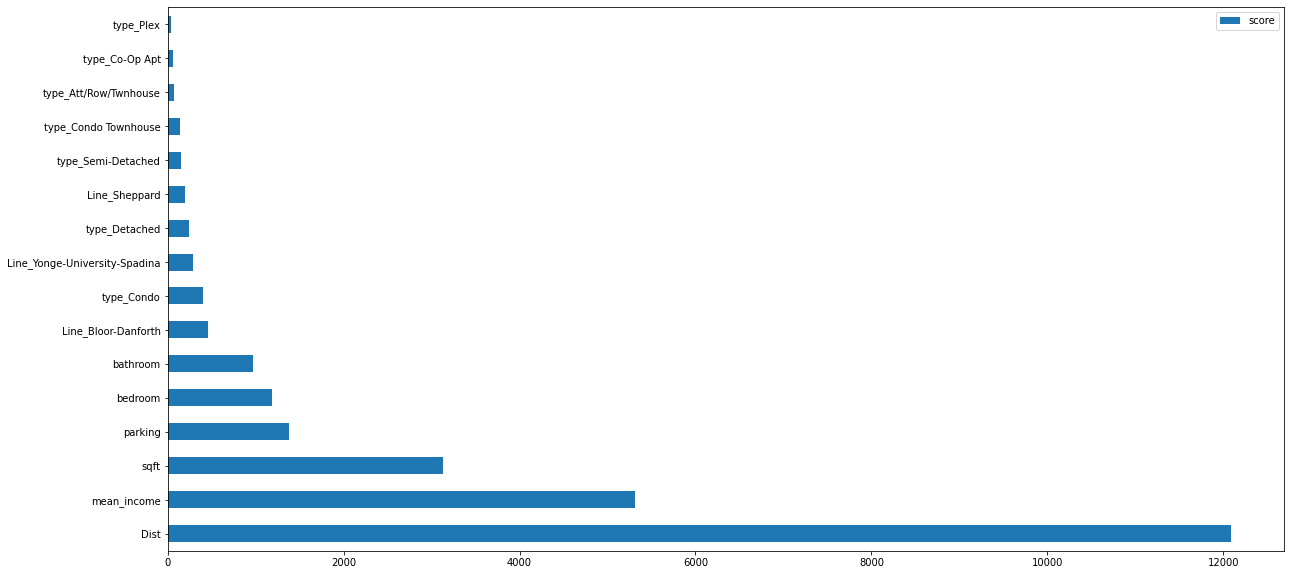

In [ ]:
feature_important = clf21.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)
yhlgb2 = gbm.predict(X_test)
print(mean_squared_error(yhlgb2, y_test))


0.12008874684328849


Begin to optimize lgb

In [ ]:

space_lgb={'max_depth':  hp.uniform('max_depth', 1, 12),
       'num_leaves': hp.quniform('num_leaves', 30, 150, 5),
       'learning_rate': hp.uniform('learning_rate', 0.01,0.1),
       'feature_fraction': hp.uniform('feature_fraction', 0.5, 1),
       'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1),
       'lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('lambda_l2_positive', -16, 2)]),
       'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'reg_alpha' : None,
        'reg_lambda' : None,
        'min_sum_hessian_in_leaf': None,
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'nthread': 4,
        'seed': 33
    }
def objective_lgb(space):
    clf=lgb.LGBMRegressor(
                    learning_rate=space['learning_rate'], max_depth = int(space['max_depth']), 
                    num_leaves=int(space['num_leaves']),feature_fraction = space['feature_fraction'], 
                    bagging_fraction=space['bagging_fraction'], lambda_l2 = space['lambda_l2'],
                    subsample=space['subsample'], min_child_weight=int(space['min_child_weight']),
                    reg_alpha = space['reg_alpha'], reg_lambda = space['reg_lambda'], 
                    colsample_bytree=int(space['colsample_bytree']), min_sum_hessian_in_leaf=space['min_sum_hessian_in_leaf'])
    
    evaluation = [( X_train1, y_train1), (X_validation1, y_validation1)]
    clf.fit(X_train1, y_train1, eval_set=[(X_validation1, y_validation1)], 
         eval_metric='l2', early_stopping_rounds=50)

    pred = clf.predict(X_validation1)

    accuracy = mean_squared_error(y_validation1, pred)

    print ("SCORE:", accuracy)
    return {'loss': accuracy, 'status': STATUS_OK }



In [ ]:
t_lgb = Trials()
best_hyperparams = fmin(fn = objective_lgb, space = space_lgb,
                        algo = tpe.suggest,max_evals = 200,trials = t_lgb)

Streaming output truncated to the last 5000 lines.
[42]	valid_0's l2: 0.125013	valid_0's l2: 0.125013
[43]	valid_0's l2: 0.124696	valid_0's l2: 0.124696
[44]	valid_0's l2: 0.123986	valid_0's l2: 0.123986
[45]	valid_0's l2: 0.12315	valid_0's l2: 0.12315
[46]	valid_0's l2: 0.122975	valid_0's l2: 0.122975
[47]	valid_0's l2: 0.122497	valid_0's l2: 0.122497
[48]	valid_0's l2: 0.121968	valid_0's l2: 0.121968
[49]	valid_0's l2: 0.121641	valid_0's l2: 0.121641
[50]	valid_0's l2: 0.121576	valid_0's l2: 0.121576
[51]	valid_0's l2: 0.121432	valid_0's l2: 0.121432
[52]	valid_0's l2: 0.121188	valid_0's l2: 0.121188
[53]	valid_0's l2: 0.12067	valid_0's l2: 0.12067
[54]	valid_0's l2: 0.120681	valid_0's l2: 0.120681
[55]	valid_0's l2: 0.1205	valid_0's l2: 0.1205
[56]	valid_0's l2: 0.120373	valid_0's l2: 0.120373
[57]	valid_0's l2: 0.120344	valid_0's l2: 0.120344
[58]	valid_0's l2: 0.120146	valid_0's l2: 0.120146
[59]	valid_0's l2: 0.120018	valid_0's l2: 0.120018
[60]	valid_0's l2: 0.119977	valid_0's l

In [ ]:
best_hyperparams

{'bagging_fraction': 0.6124177741652472,
 'colsample_bytree': 0.6152376644106363,
 'feature_fraction': 0.7411853401404787,
 'lambda_l2': 1,
 'lambda_l2_positive': 0.017543805861720725,
 'learning_rate': 0.09994660911427969,
 'max_depth': 11.319939594765033,
 'min_child_weight': 19.0,
 'num_leaves': 145.0,
 'subsample': 0.8500000000000001}

{'bagging_fraction': 0.6124177741652472,
 'colsample_bytree': 0.6152376644106363,
 'feature_fraction': 0.7411853401404787,
 'lambda_l2': 1,
 'lambda_l2_positive': 0.017543805861720725,
 'learning_rate': 0.09994660911427969,
 'max_depth': 11.319939594765033,
 'min_child_weight': 19.0,
 'num_leaves': 145.0,
 'subsample': 0.8500000000000001}

In [ ]:
gbm1 = lgb.LGBMRegressor(learning_rate=0.09994660911427969, max_depth = 11, 
                    num_leaves=145,feature_fraction = 0.7411853401404787, 
                    bagging_fraction=0.6124177741652472, lambda_l2 =1,
                    subsample=0.85, min_child_weight=19,
                    colsample_bytree=0.6152376644106363)
gbm1.fit(X_train, y_train)
yhgbm1 = gbm1.predict(X_test)
mean_squared_error(yhgbm1, y_test)

0.10146606459802882